In [168]:
# importing libraries

import numpy as np    # linear algebra
import pandas as pd   # data processing
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.utils
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit  # splitting the dataset
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from imblearn.over_sampling import ADASYN
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier, KerasRegressor

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


## DATASET ANALYSIS AND PREPROCESSING

In [4]:
# reading the dataset
credit_data = pd.read_csv("D:\AI & DS\L5 Year 2\CM2603 Data Science Group Project\Datasets\Dataset - 2023\creditcard_2023.csv")
# displaying the head of the dataset
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
# number of instances and attributes
credit_data.shape

(568630, 31)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
# sum of missing cells for each attribute
credit_data.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# displaying the descriptive statistics of the dataset
credit_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


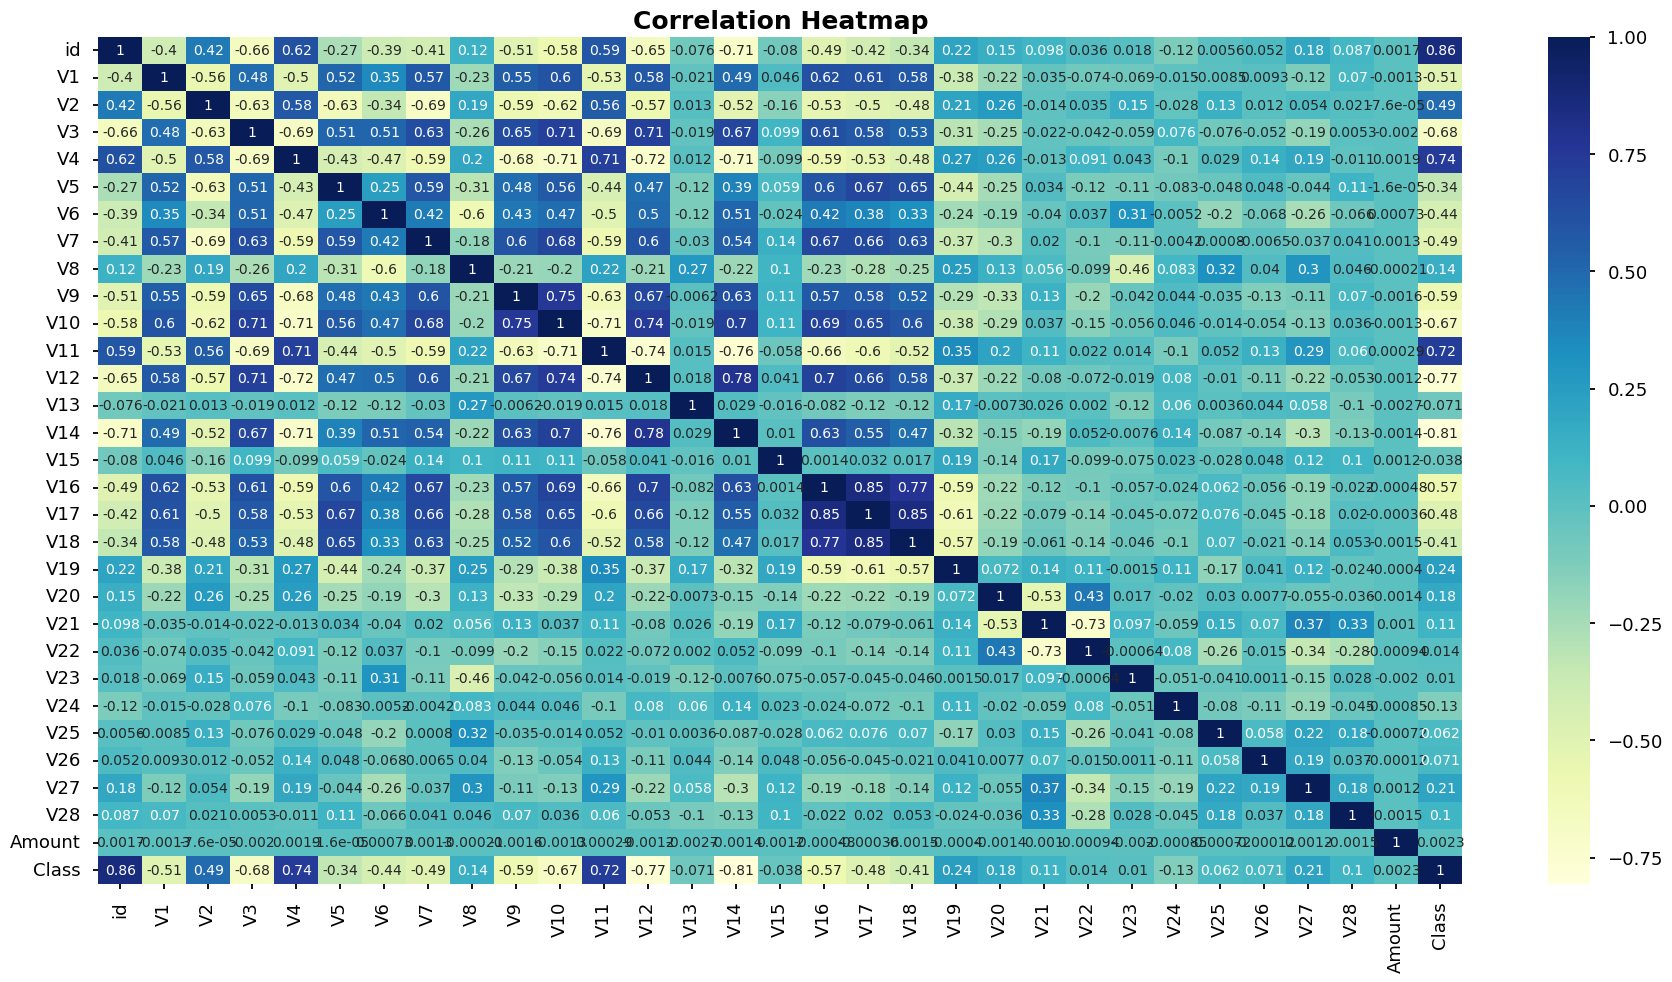

In [9]:
# displaying the corelation matrix of the dataframe
#corr = df.drop(columns=['Class']).corr()
#sns.heatmap(corr);

# style of the plot
plt.style.use("seaborn-v0_8-talk")

# figure size of the plot
plt.rcParams['figure.figsize']= (22,11)

plt.title("Correlation Heatmap",fontsize=18, weight= 'bold')

sns.heatmap(credit_data.corr(), cmap="YlGnBu", annot=True)

plt.show()

### CALCULATING THE RELEVANT FREQUENCIES OF THE CLASS

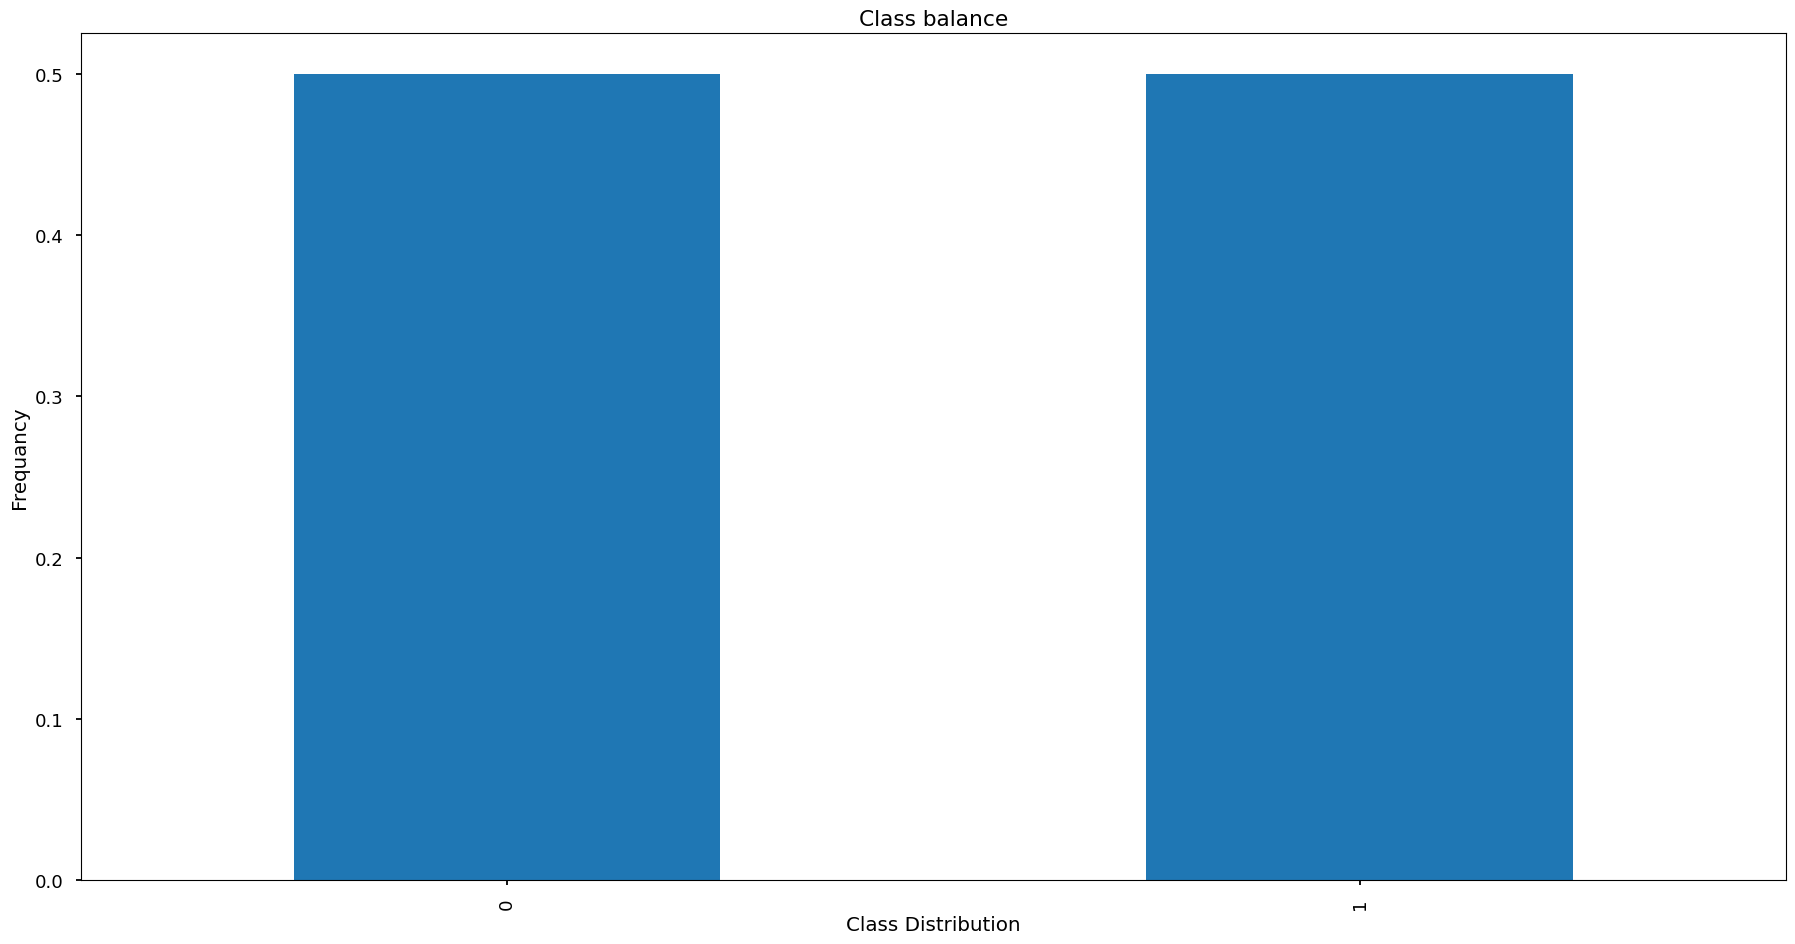

In [11]:
# visualizing the distribution of the class diagram
credit_data['Class'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Class Distribution")
plt.ylabel("Frequancy")
plt.title("Class balance");

In [12]:
# checking the percentage of each class in the dataset
(credit_data.Class.value_counts())/(credit_data.Class.count())

Class
0    0.5
1    0.5
Name: count, dtype: float64

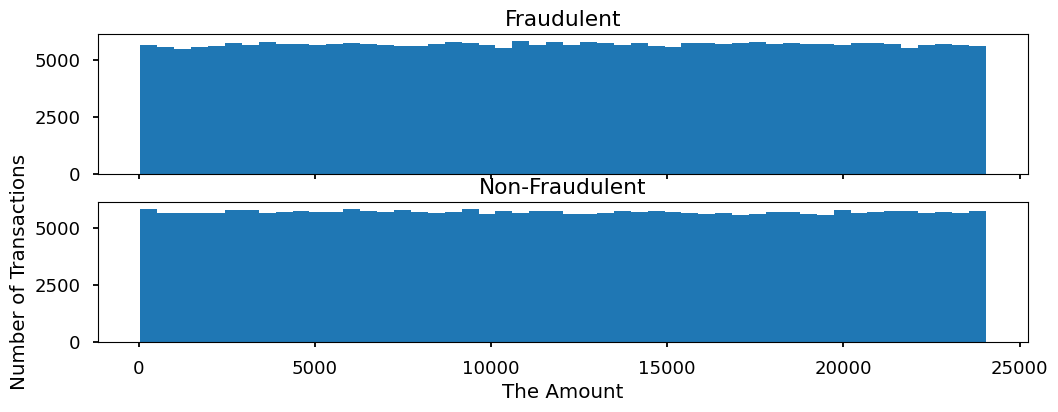

In [13]:
# histrogram for feature Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(credit_data["Amount"][credit_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(credit_data["Amount"][credit_data["Class"] == 0], bins = 50)
ax2.set_title('Non-Fraudulent')

plt.xlabel('The Amount')
plt.ylabel('Number of Transactions')
plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

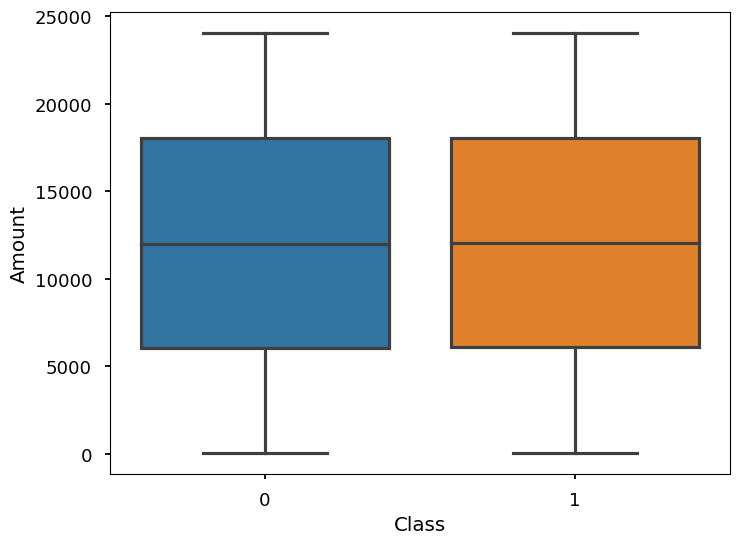

In [14]:
# boxplot for the Amount feature, in order to visualiza the outliers
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(x=credit_data['Class'], y=credit_data['Amount'])

### SPLITTING THE DATA

In [15]:
# splitting data before sampling
# splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = credit_data.drop(['id', 'Class'], axis=1)
Y = credit_data['Class']

split_data1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in split_data1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

# splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
split_data2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in split_data2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [225908 154030 465602 ... 435008 425933 399135] Test: [510747 390373  81077 ... 498586 443122 324570]
Train: [251357 472416 111001 ... 174786 560799  35559] Test: [542797 312194 353612 ... 104977 381292 246625]
Train: [147021 489030 316687 ...  33249 186094  15846] Test: [534820 298025 445615 ... 189362  64919 142584]
Train: [434310 410119 273366 ... 309475  21808 295256] Test: [506571 417439 266334 ... 111681 213082 419599]
Train: [294979 180635 428922 ... 179336 241829  55694] Test: [444595 383082 322502 ... 415342 328251 362999]
Train: [251808 311199  83014 ... 355133 166975  67135] Validation: [133847 195322 332078 ...  14026  94265 201779]
Train: [345294 313998 132424 ... 213200 109201 241832] Validation: [272253 224159 152679 ... 392646  47685 152396]
Train: [ 21162 308401 142096 ...  50180  51461  18176] Validation: [174991  16137 283305 ... 384928 324548 411333]
Train: [204342 194453 330200 ... 416243 365201 351800] Validation: [179403 438590 104801 ...   3870 451621 262

In [16]:
# checking if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.62532461 0.37467539]
[0.5 0.5]
[0.62402617 0.37597383]


In [17]:
# dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(341178, 29)
(341178,)
(113726, 29)
(113726,)
(113726, 29)
(113726,)


In [18]:
# checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

Class
0    213347
1    127831
Name: count, dtype: int64


## OVERSAMPLING

In [19]:
# using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

# oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 215447, 0: 213347})
Shape of X_adasampled: (428794, 29)
Shape of Y_adasampled: (428794,)


In [20]:
# check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49755127 0.50244873]


In [21]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
# joining the oversampled data to a dataframe
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0  0.196894  0.020810 -0.400766  0.113021 -0.199370 -0.736886 -0.160623   
1 -0.377420 -0.234533 -0.313118  0.472103 -0.597757  0.460094 -0.065450   
2  0.385983  0.617816 -0.756279  1.186686  1.084056 -1.158269  0.209002   
3 -0.331078  0.539216 -0.280692 -0.154300  0.400040 -0.699096  0.754739   
4  0.859744 -1.215530  1.371288 -1.008949 -0.438582  0.687417  0.017710   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0 -0.006878 -0.120788 -0.525719  ...  0.250243  0.099177 -0.248599  0.062724   
1  0.114492 -0.446178 -0.634457  ...  1.399639  0.255082  0.091926  0.659694   
2 -0.141292 -0.590338 -0.715247  ...  0.165032 -0.041766 -0.603459 -0.583281   
3 -0.165484  1.756085  1.791134  ...  1.159380 -0.284438 -0.191662  0.265968   
4 -0.113165  0.027267  1.153915  ... -0.125507 -0.220742 -0.355116 -0.110676   

        V24       V25       V26       V27       V28    Amount  
0 -0

In [23]:
# merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_credit_data= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
1,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
2,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
3,-0.331078,0.539216,-0.280692,-0.154300,0.400040,-0.699096,0.754739,-0.165484,1.756085,1.791134,...,-0.284438,-0.191662,0.265968,0.445129,-0.294509,-1.005541,0.899601,0.207382,6477.67,0
4,0.859744,-1.215530,1.371288,-1.008949,-0.438582,0.687417,0.017710,-0.113165,0.027267,1.153915,...,-0.220742,-0.355116,-0.110676,1.242794,0.380800,-0.616480,-0.157335,0.025919,1756.84,0


Text(0.5, 1.0, 'Balanced Correlation Matrix')

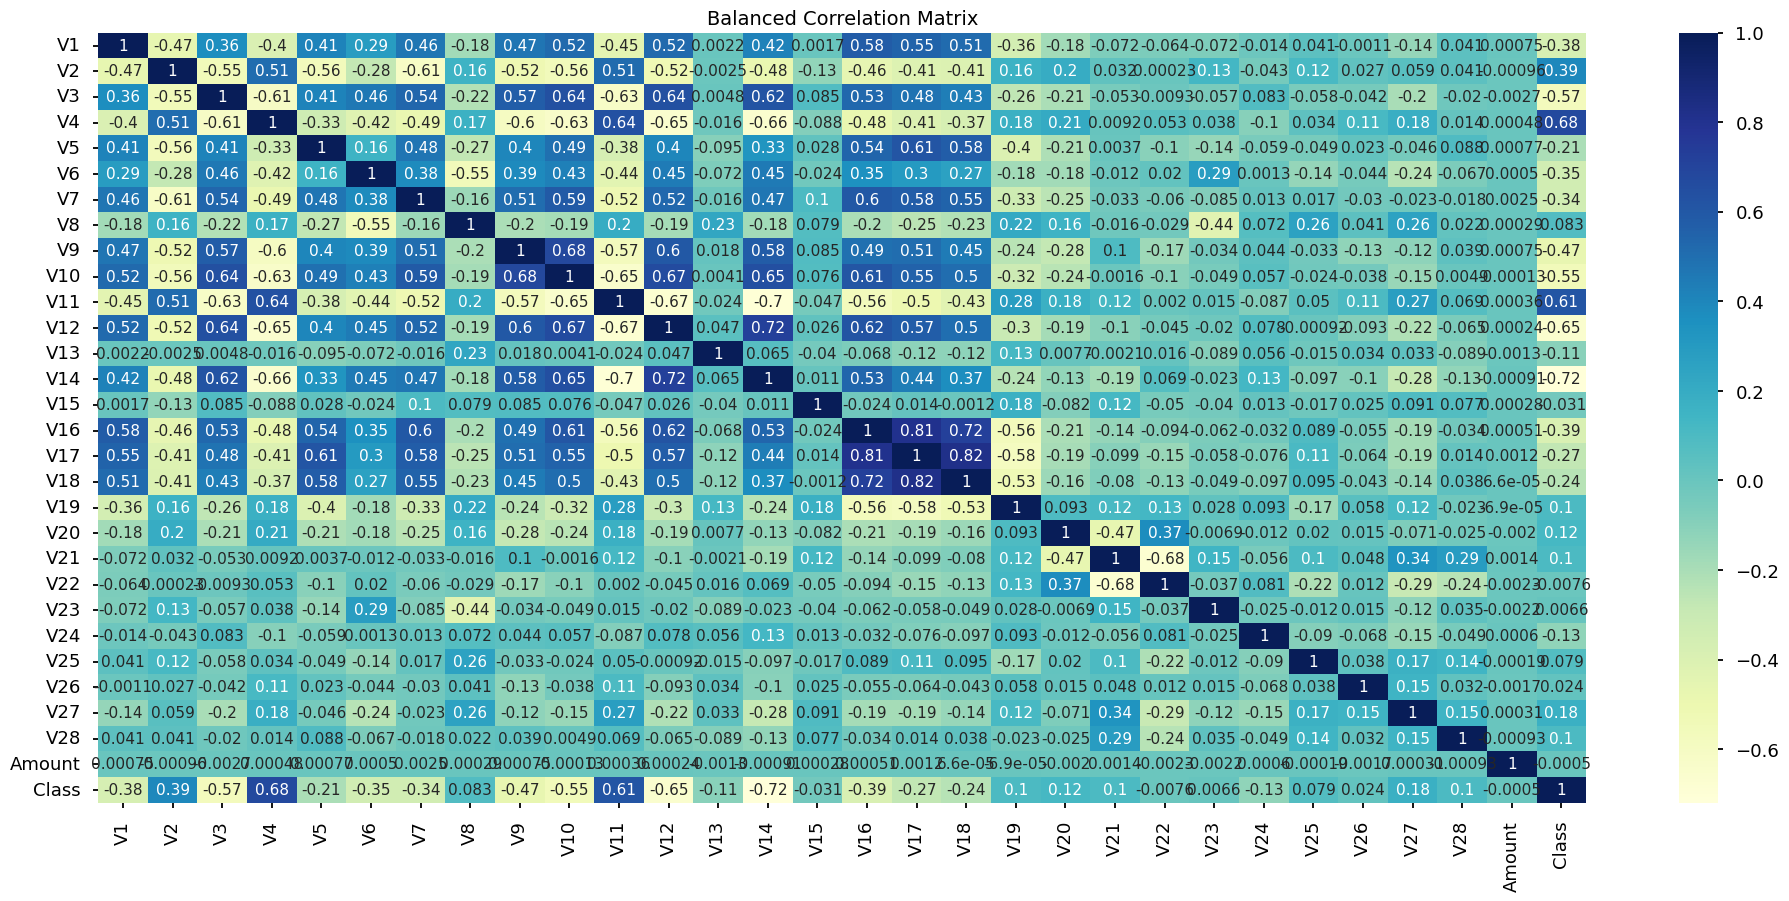

In [24]:
# checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_credit_data.corr()
plt.rcParams['figure.figsize']= (22,11)
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':11}, ax=ax1, annot=True)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


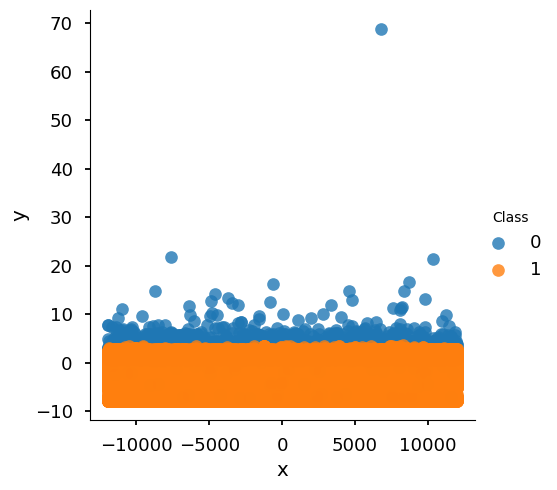

In [26]:
# visualizing balanced train dataset
pca= PCA(n_components=2)
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

In [82]:
# an undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
440873,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
351626,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
327322,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
55058,-0.331078,0.539216,-0.280692,-0.154300,0.400040,-0.699096,0.754739,-0.165484,1.756085,1.791134,...,-0.284438,-0.191662,0.265968,0.445129,-0.294509,-1.005541,0.899601,0.207382,6477.67,0
132573,0.859744,-1.215530,1.371288,-1.008949,-0.438582,0.687417,0.017710,-0.113165,0.027267,1.153915,...,-0.220742,-0.355116,-0.110676,1.242794,0.380800,-0.616480,-0.157335,0.025919,1756.84,0


In [83]:
Train_set.shape

(341178, 30)

In [85]:
# length of Frauds
length_frauds=len(Train_set[Train_set.Class==1])
length_frauds

127831

In [86]:
# taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
440873,0.196894,0.020810,-0.400766,0.113021,-0.199370,-0.736886,-0.160623,-0.006878,-0.120788,-0.525719,...,0.099177,-0.248599,0.062724,-0.040666,-0.349783,-0.396623,0.561169,0.734948,12854.85,1
351626,-0.377420,-0.234533,-0.313118,0.472103,-0.597757,0.460094,-0.065450,0.114492,-0.446178,-0.634457,...,0.255082,0.091926,0.659694,-0.307038,0.187064,1.772083,0.383086,0.745620,15241.69,1
327322,0.385983,0.617816,-0.756279,1.186686,1.084056,-1.158269,0.209002,-0.141292,-0.590338,-0.715247,...,-0.041766,-0.603459,-0.583281,-1.034363,2.459980,1.152545,0.428513,0.880200,16937.14,1
451845,-0.812629,1.643804,-1.608390,2.037126,-0.777417,-1.646700,-1.396843,1.053261,-1.758587,-1.754778,...,0.628766,0.156889,0.414185,-1.927243,-0.678371,1.320707,2.123128,1.654559,11454.85,1
390786,-2.313585,3.172742,-2.319236,2.065894,-2.669864,0.299274,-3.309221,-2.241627,-2.729062,-2.777298,...,-4.204549,3.579529,1.789253,0.487979,-1.542600,-1.283606,-4.266479,-2.590024,12332.80,1


In [88]:
# taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
# randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(127831, 30)

In [107]:
# appending both Frauds and Non-Frauds
undersampled_df = pd.concat([fraud_df, non_frauds], ignore_index=True)

# randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213682,-0.220245,-0.060439,1.382789,-0.617447,0.172383,0.093729,0.656618,-0.059718,0.019370,0.334082,...,-0.052113,0.234423,-0.180464,0.938193,0.643534,0.981412,-0.092247,0.016922,5814.53,0
104927,-2.549248,3.203669,-2.441633,1.268019,-3.154114,-2.823837,-2.394460,5.520487,-1.076794,-1.189562,...,0.571818,-1.791376,-1.267876,0.369159,3.536554,-0.487701,1.589294,0.817579,11622.98,1
122381,-1.551729,0.834905,-1.638168,1.980724,-1.794101,0.268031,-1.885774,-0.166808,-1.620095,-1.840553,...,-0.645767,1.268467,1.252423,-0.517149,-2.277105,0.178376,1.425678,-3.646049,2928.69,1
131163,0.164011,-0.121730,1.288466,0.557661,0.410625,0.475818,0.431928,-0.126121,0.676374,0.635375,...,-0.105634,0.330232,0.118559,0.836654,-2.018396,0.066278,0.082536,0.557724,7239.67,0
111489,-0.290879,-0.943072,-0.401217,0.652071,0.123191,0.410096,0.245937,-0.047384,0.202673,-0.113865,...,0.053123,-0.335306,-0.534323,-1.427424,-0.417589,-0.282574,0.266026,-0.860966,6147.28,1


In [108]:
# separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(255662, 29)
(255662,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
213682,-0.220245,-0.060439,1.382789,-0.617447,0.172383,0.093729,0.656618,-0.059718,0.019370,0.334082,...,-0.048546,-0.052113,0.234423,-0.180464,0.938193,0.643534,0.981412,-0.092247,0.016922,5814.53
104927,-2.549248,3.203669,-2.441633,1.268019,-3.154114,-2.823837,-2.394460,5.520487,-1.076794,-1.189562,...,1.479449,0.571818,-1.791376,-1.267876,0.369159,3.536554,-0.487701,1.589294,0.817579,11622.98
122381,-1.551729,0.834905,-1.638168,1.980724,-1.794101,0.268031,-1.885774,-0.166808,-1.620095,-1.840553,...,-0.250031,-0.645767,1.268467,1.252423,-0.517149,-2.277105,0.178376,1.425678,-3.646049,2928.69
131163,0.164011,-0.121730,1.288466,0.557661,0.410625,0.475818,0.431928,-0.126121,0.676374,0.635375,...,-0.090767,-0.105634,0.330232,0.118559,0.836654,-2.018396,0.066278,0.082536,0.557724,7239.67
111489,-0.290879,-0.943072,-0.401217,0.652071,0.123191,0.410096,0.245937,-0.047384,0.202673,-0.113865,...,0.509295,0.053123,-0.335306,-0.534323,-1.427424,-0.417589,-0.282574,0.266026,-0.860966,6147.28


In [109]:
# converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [110]:
# converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Different numbers of neurons
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],  # 'adam' is generally better for large datasets
    'alpha': [0.0001, 0.05],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    # 'batch_size': [64, 128],  # Optionally, you can also tune the batch size
}

# Initialize the MLP Classifier
mlp = MLPClassifier(max_iter=200)  # You might need to increase max_iter for convergence

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Fit the GridSearchCV on the undersampled data
grid_search.fit(X_us_arr, Y_us_arr)

# Get the best parameters and the best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Score: {best_score}")


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score: 0.9687399705283567


D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## EXPERIMENTAL DESIGN

In [28]:
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,100):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred_probs = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_first_pred = (Y_first_pred_probs > 0.5).astype(int)

    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))




[0.9527014294559453, 0.9527093329972363, 0.9163778615444507, 0.9522542096686585, 0.8573294090466193, 0.8941034663763439, 0.941063674831525, 0.9374386699005758, 0.9360907147504415, 0.9475280450494391, 0.942697247706422, 0.3494782608695652, 0.8766084354601386, 0.9290298576876569, 0.9565504502012298, 0.9491171531024466, 0.9436238894917872, 0.9112138816694695, 0.9528120341509689, 0.9549642123166324, 0.8767588597158177, 0.8139559133281892, 0.9501495964060707, 0.9440472261944048, 0.9535427266679851, 0.9357835668363744, 0.8930232558139535, 0.9477386843088476, 0.9542154366582397, 0.9230233368164403, 0.9529474033605152, 0.9318512983373809, 0.9482503248552918, 0.9416328072454554, 0.9553900008975855, 0.9459503920744302, 0.941597029639116, 0.9273241873454381, 0.9339719338787528, 0.9521832160731124, 0.9266063601604028, 0.931910099909509, 0.9318831433980473, 0.9437524704238558, 0.9157900743756062, 0.9058044170103936, 0.9268554026618542, 0.9510402143801264, 0.9547584990868936, 0.9388349067464886, 

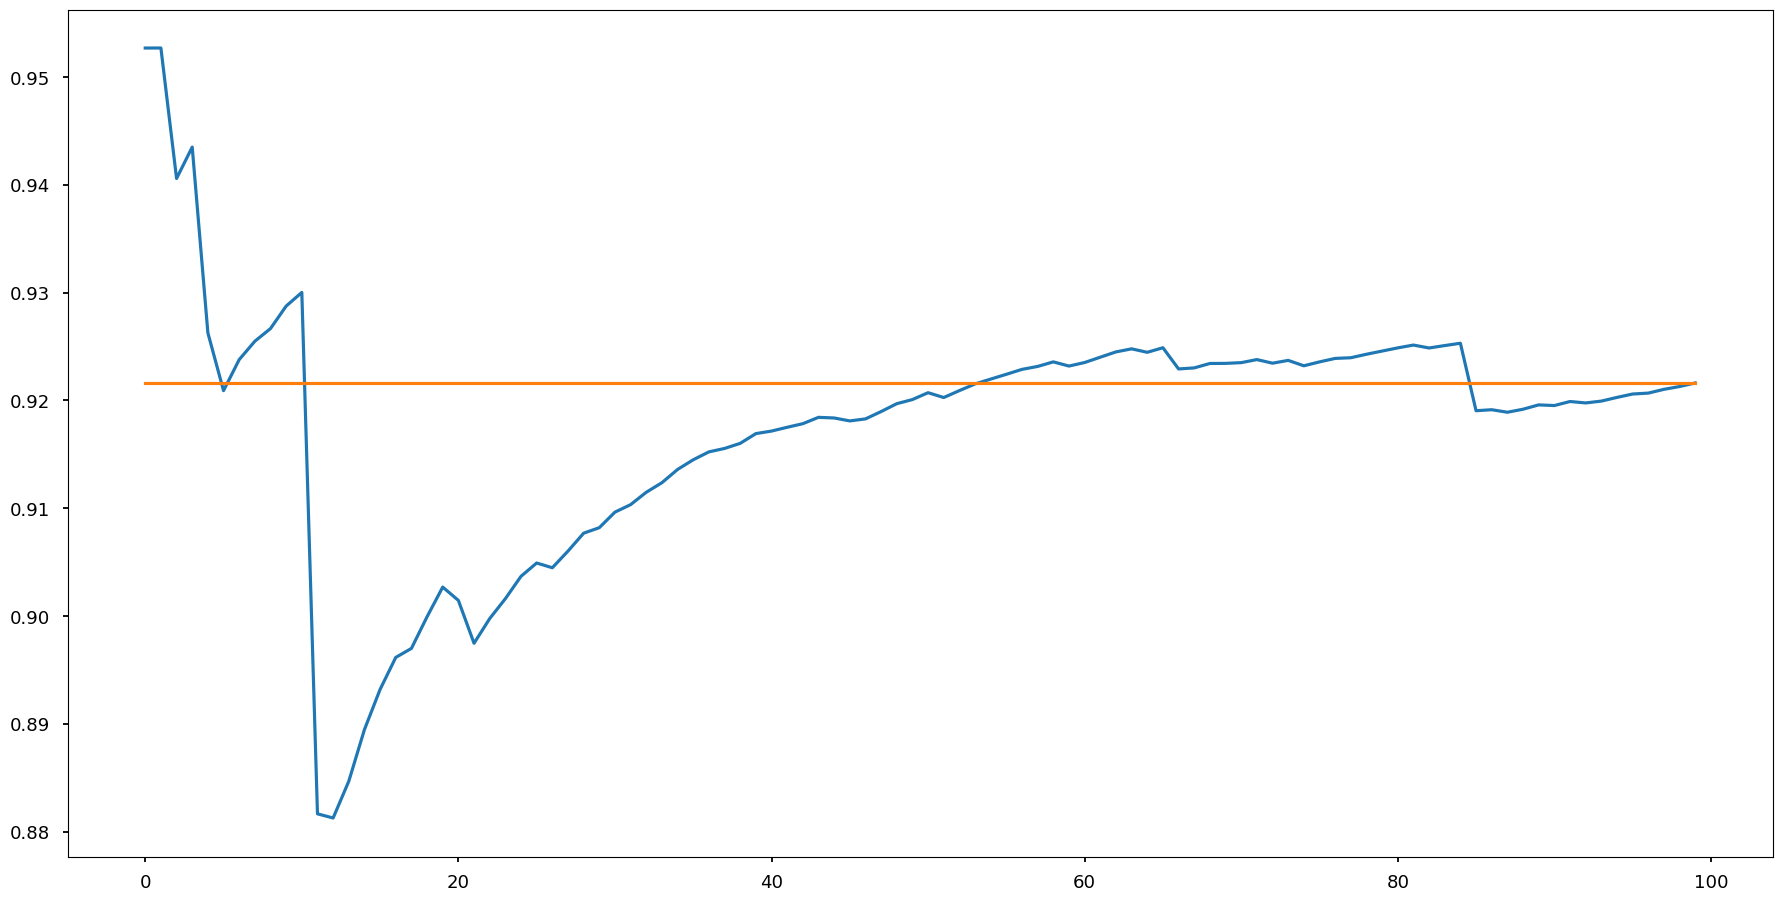

In [28]:
# plotting number of repeats against the average score from those repeats.
# expected: ss the number of repeats increase, the average score stabilizes
f_score_list=[0.9527014294559453, 0.9527093329972363, 0.9163778615444507, 0.9522542096686585, 0.8573294090466193, 0.8941034663763439, 0.941063674831525, 0.9374386699005758, 0.9360907147504415, 0.9475280450494391, 0.942697247706422, 0.3494782608695652, 0.8766084354601386, 0.9290298576876569, 0.9565504502012298, 0.9491171531024466, 0.9436238894917872, 0.9112138816694695, 0.9528120341509689, 0.9549642123166324, 0.8767588597158177, 0.8139559133281892, 0.9501495964060707, 0.9440472261944048, 0.9535427266679851, 0.9357835668363744, 0.8930232558139535, 0.9477386843088476, 0.9542154366582397, 0.9230233368164403, 0.9529474033605152, 0.9318512983373809, 0.9482503248552918, 0.9416328072454554, 0.9553900008975855, 0.9459503920744302, 0.941597029639116, 0.9273241873454381, 0.9339719338787528, 0.9521832160731124, 0.9266063601604028, 0.931910099909509, 0.9318831433980473, 0.9437524704238558, 0.9157900743756062, 0.9058044170103936, 0.9268554026618542, 0.9510402143801264, 0.9547584990868936, 0.9388349067464886, 0.9526103548133915, 0.8973456987527982, 0.954398919405673, 0.9541467411147623, 0.9463939991535419, 0.9468782023129849, 0.9485288083666901, 0.9386591113209819, 0.9481053612883177, 0.9003062594800353, 0.9432265420973259, 0.9541936645068394, 0.9549479898791117, 0.9426316951147734, 0.9039174701638459, 0.9524309167382751, 0.7930514877541491, 0.9295544735583012, 0.9513269523602349, 0.924077661155908, 0.9282266999680757, 0.9440120420001468, 0.8993073333784163, 0.9428006074271778, 0.8861275129011094, 0.9505524460274769, 0.9485554366614536, 0.9287786739781595, 0.9495224106629688, 0.9480088898604585, 0.9484690339768622, 0.9463697720533392, 0.9025618272309889, 0.9437885624827332, 0.9432914593584211, 0.3868204189892629, 0.9272153681482732, 0.8984977316037415, 0.9438253898205354, 0.9554838479640589, 0.9140298903012692, 0.9540047225289772, 0.9076010823050795, 0.9357249904588147, 0.9525377377161259, 0.9505317945236478, 0.9287019424480655, 0.9550274871431105, 0.946837244953827, 0.954504013300202]
f_df=pd.DataFrame(f_score_list)
fscores= f_df.values
final_mean= np.mean(fscores[0:101])
means = list()
for i in range(1,len(f_score_list)+1):
    data = fscores[0:i, 0]
    mean_fscore = np.mean(data)
    means.append(mean_fscore)
# line plot of the values generated in the list
plt.plot(means)
plt.plot([final_mean for x in range(len(means))])
plt.show() #from this plot the point of diminishing returns can be located.

## IMPLEMENTATION

In [81]:
# function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=creditcard_data['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

#### TRAINING MULTI-LAYER PERCEPTRON WITH  1 HIDDEN LAYER

In [35]:
# training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
# model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

# compile Model
Model1.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

# fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 65)                1950      
                                                                 
 dense_7 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
613/613 - 2s - loss: 30.2135 - accuracy: 0.6863 - val_loss: 2.4570 - val_accuracy: 0.9168 - 2s/epoch - 3ms/step
Epoch 2/30
613/613 - 1s - loss: 5.2855 - accuracy: 0.8130 - val_loss: 2.2369 - val_accuracy: 0.9167 - 1s/epoch - 2ms/step
Epoch 3/30
613/613 - 1s - loss: 4.3136 - accuracy: 0.8381 - val_loss: 1.0211 - val_accuracy: 0.9561 - 1s/epoch - 2ms/step
Epoch 4/30
613/613 - 1s - loss: 3.5459 - accuracy: 

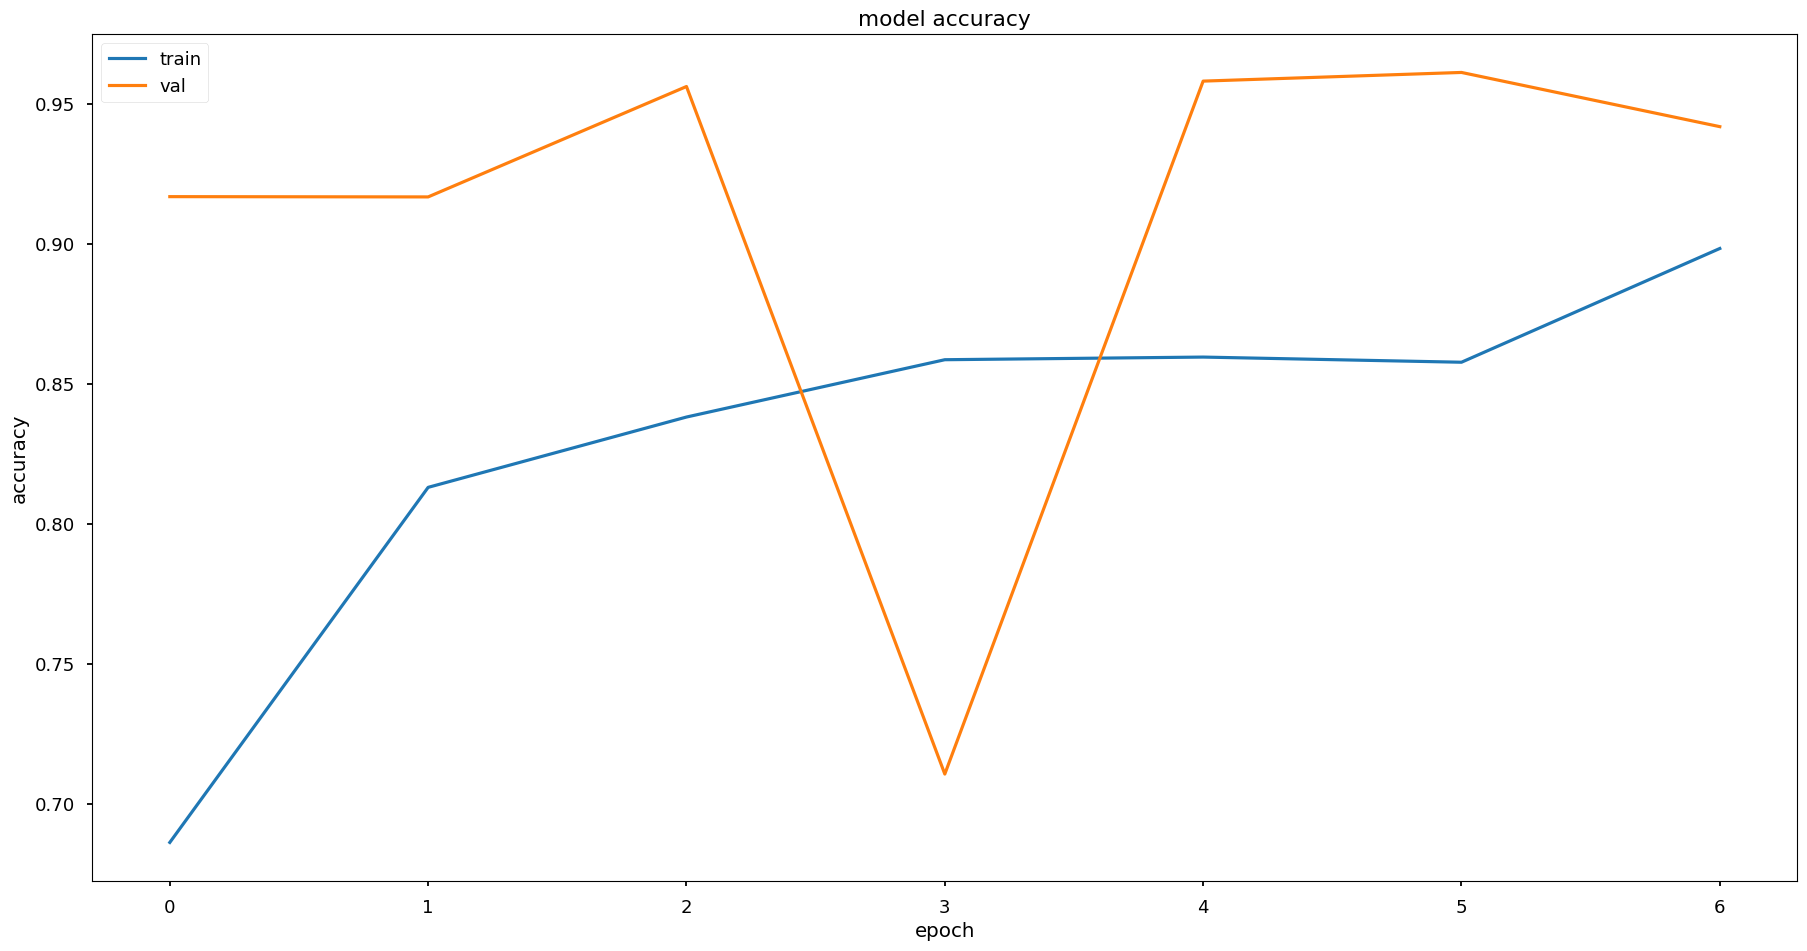

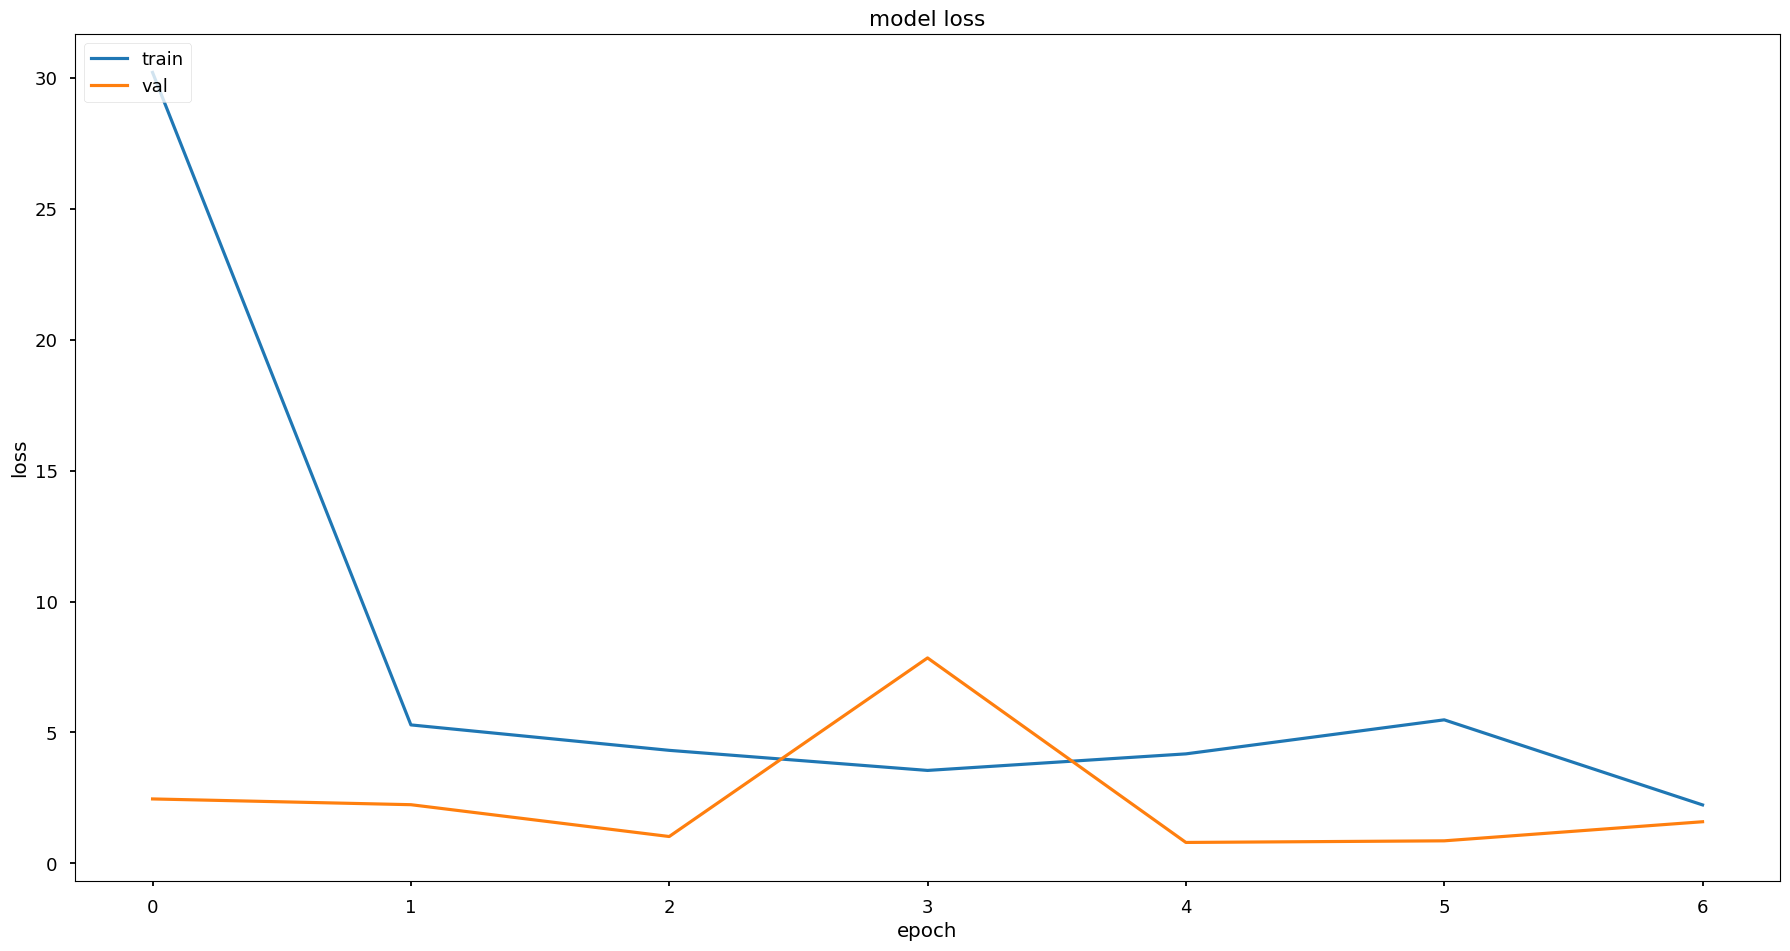

In [36]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 65)                1950      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2016 (7.88 KB)
Trainable params: 2016 (7.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/40
613/613 - 2s - loss: 195.5445 - accuracy: 0.5531 - val_loss: 2.0987 - val_accuracy: 0.4581 - 2s/epoch - 4ms/step
Epoch 2/40
613/613 - 2s - loss: 0.8987 - accuracy: 0.6833 - val_loss: 1.1701 - val_accuracy: 0.5912 - 2s/epoch - 3ms/step
Epoch 3/40
613/613 - 2s - loss: 0.8204 -

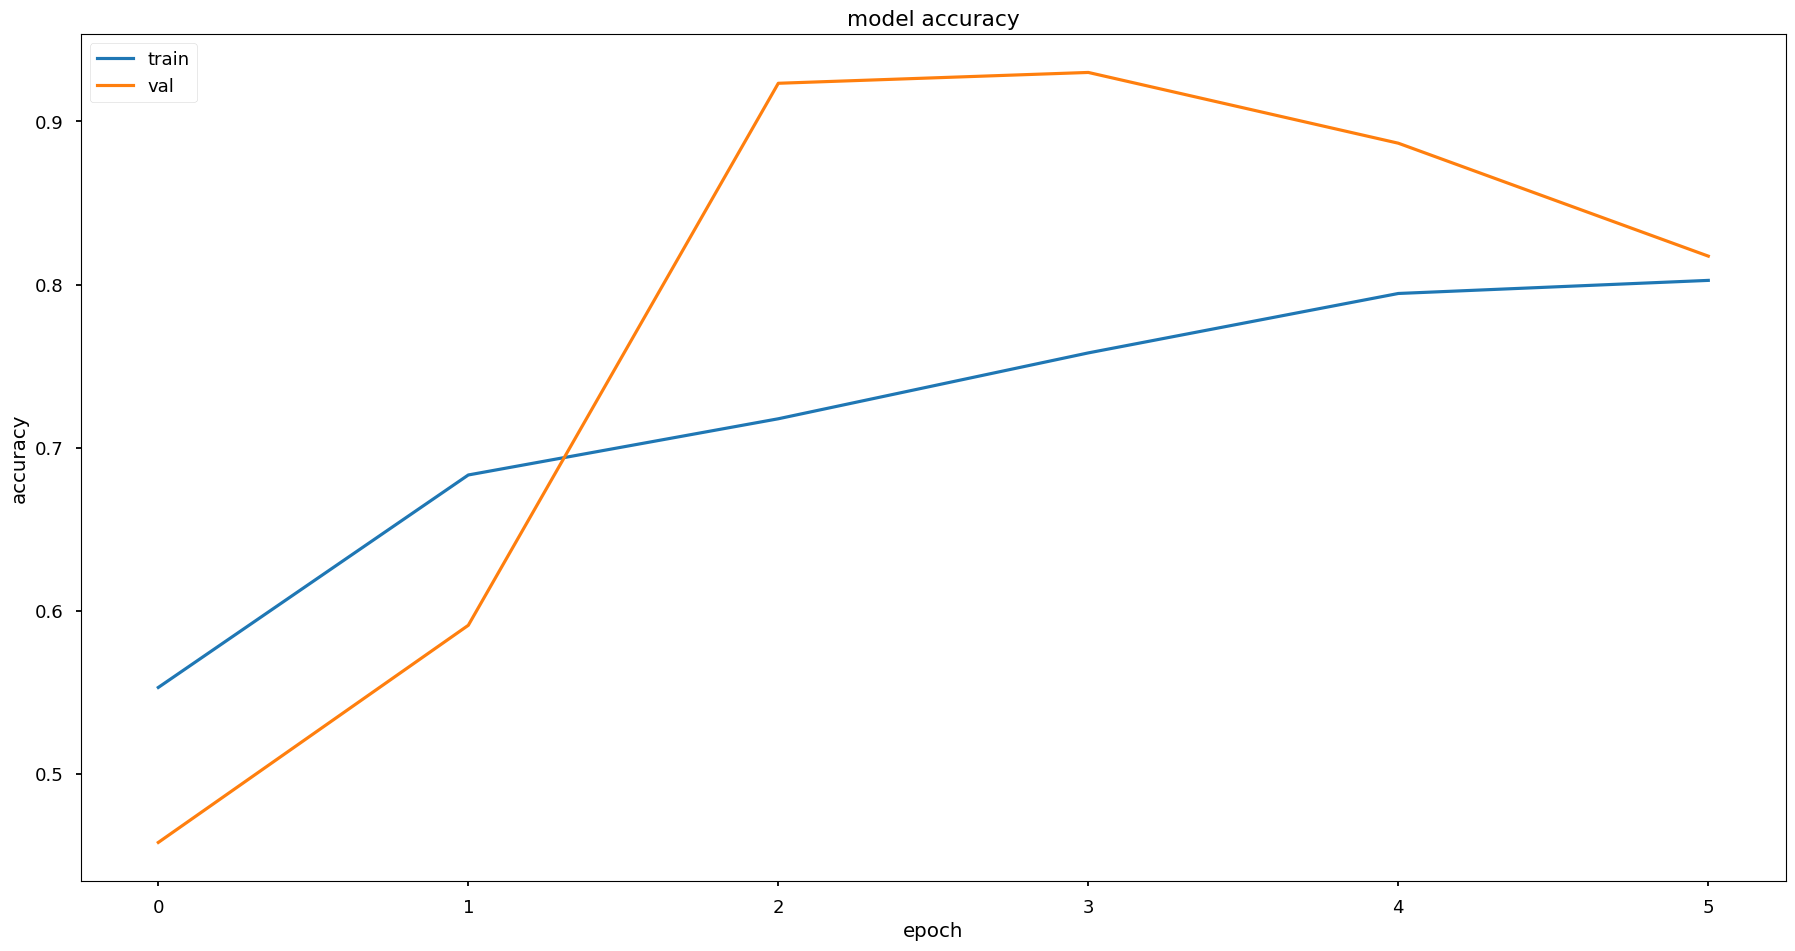

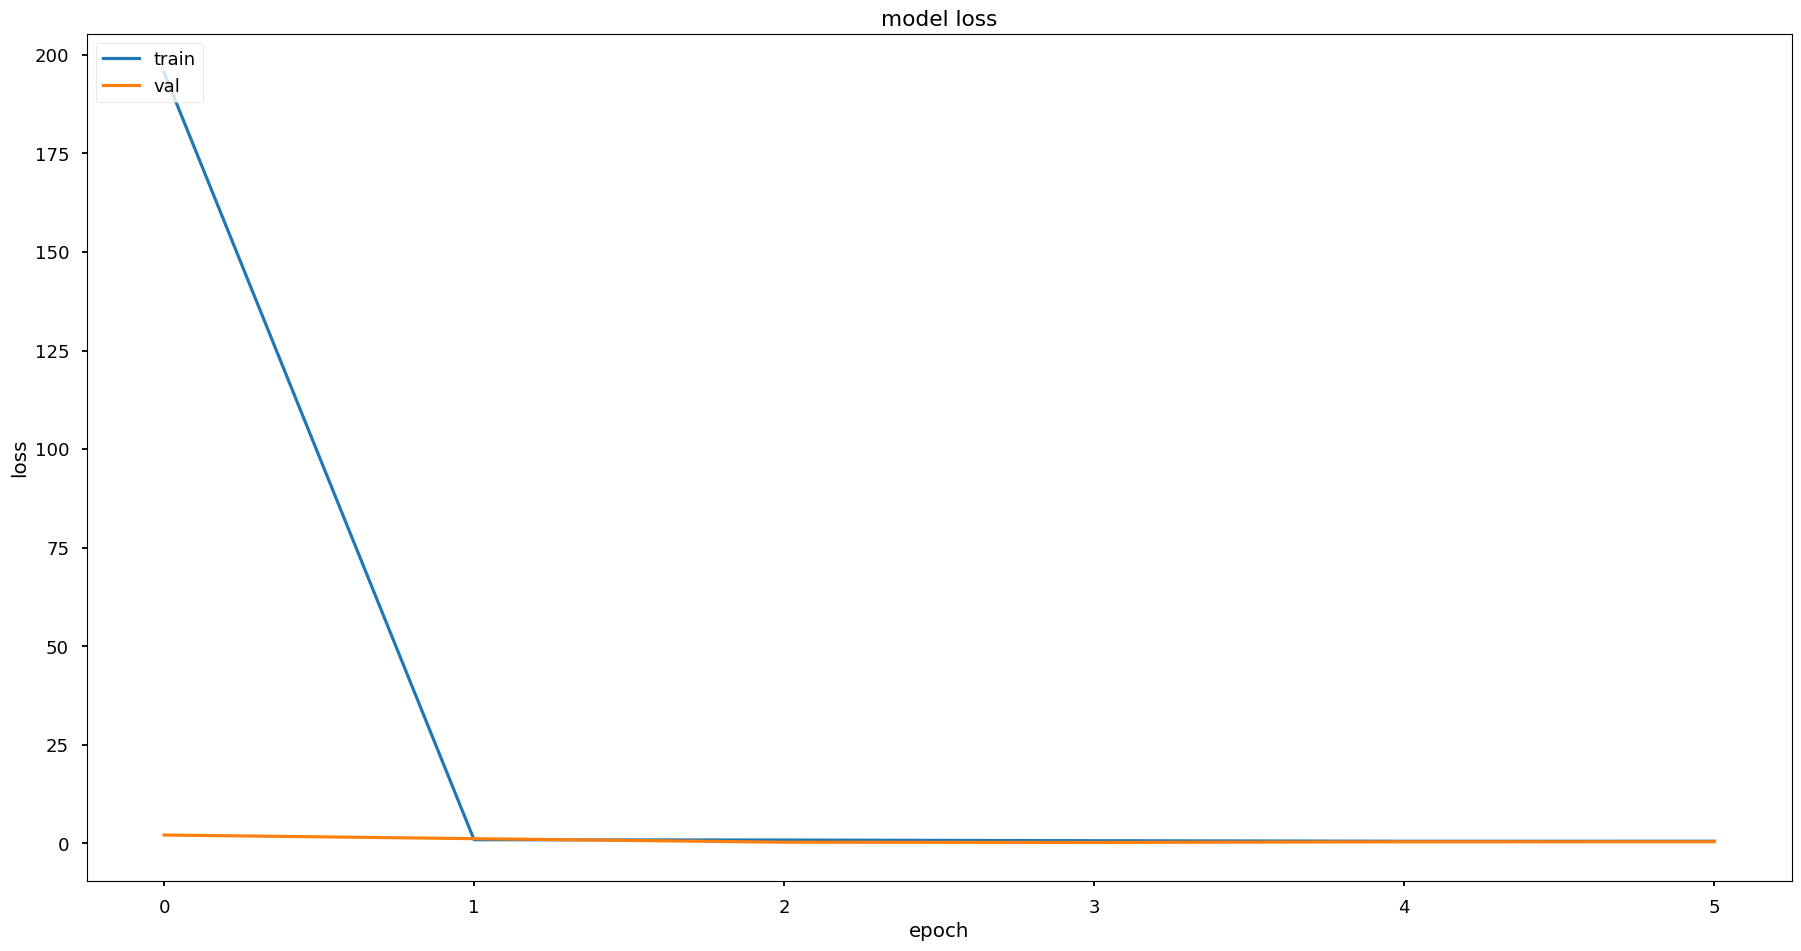

In [38]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
Y_pred_probs = Model1_drop.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred_cls = (Y_pred_probs > 0.5).astype(int)
print('Accuracy Model1 (Dropout): '+ str(Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls, zero_division=1)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))

conf_matrix = confusion_matrix(Ytest_arr, Y_pred_cls)
conf_matrix

3554/3554 [==============================] - 5s 1ms/step - loss: 0.2620 - accuracy: 0.9077
Accuracy Model1 (Dropout): 0.9076904058456421
Recall_score: 0.8165063397991664
Precision_score: 0.9986234486912008
F-score: 0.8984287317620651


array([[56799,    64],
       [10434, 46429]], dtype=int64)

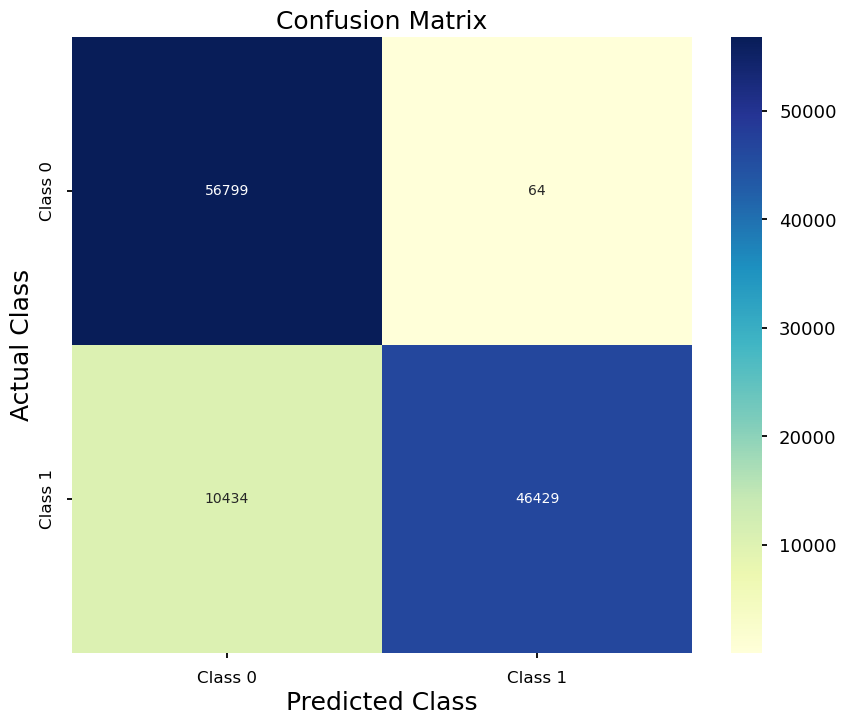

In [40]:
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# labels, title and ticks
label_font = {'size':'18'}  # adjust to fit
plt.xlabel('Predicted Class', fontdict=label_font)
plt.ylabel('Actual Class', fontdict=label_font)
plt.title('Confusion Matrix', fontdict=label_font)
tick_marks = np.arange(len(['Class 0', 'Class 1'])) + 0.5
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=0, fontsize=12)
plt.yticks(tick_marks, ['Class 0', 'Class 1'], rotation=90, fontsize=12)

plt.show()

3554/3554 [==============================] - 4s 1ms/step


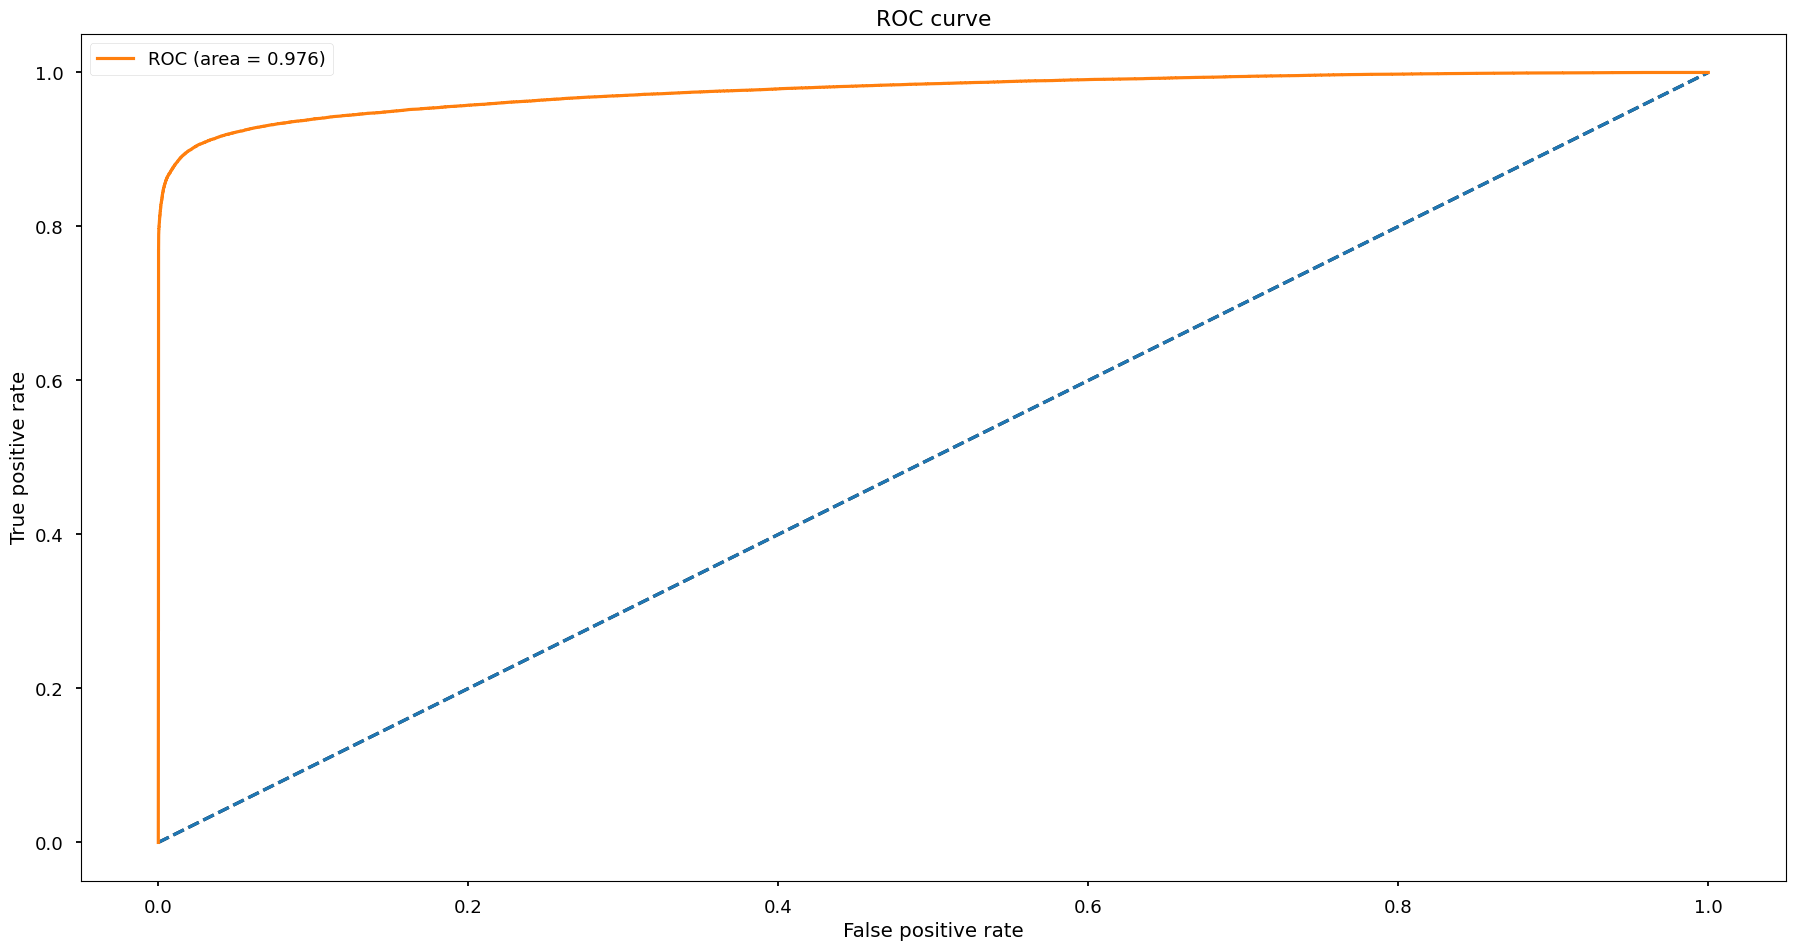

In [41]:
# plotting ROC curve
Y_pred_prob = Model1_drop.predict(Xtest_arr).ravel()

fpr_model1, tpr_model1, thresholds_model1 = roc_curve(Ytest_arr, Y_pred_prob, pos_label=1)
auc_model1 = roc_auc_score(Ytest_arr, Y_pred_prob)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC (area = {:.3f})'.format(auc_model1))

# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

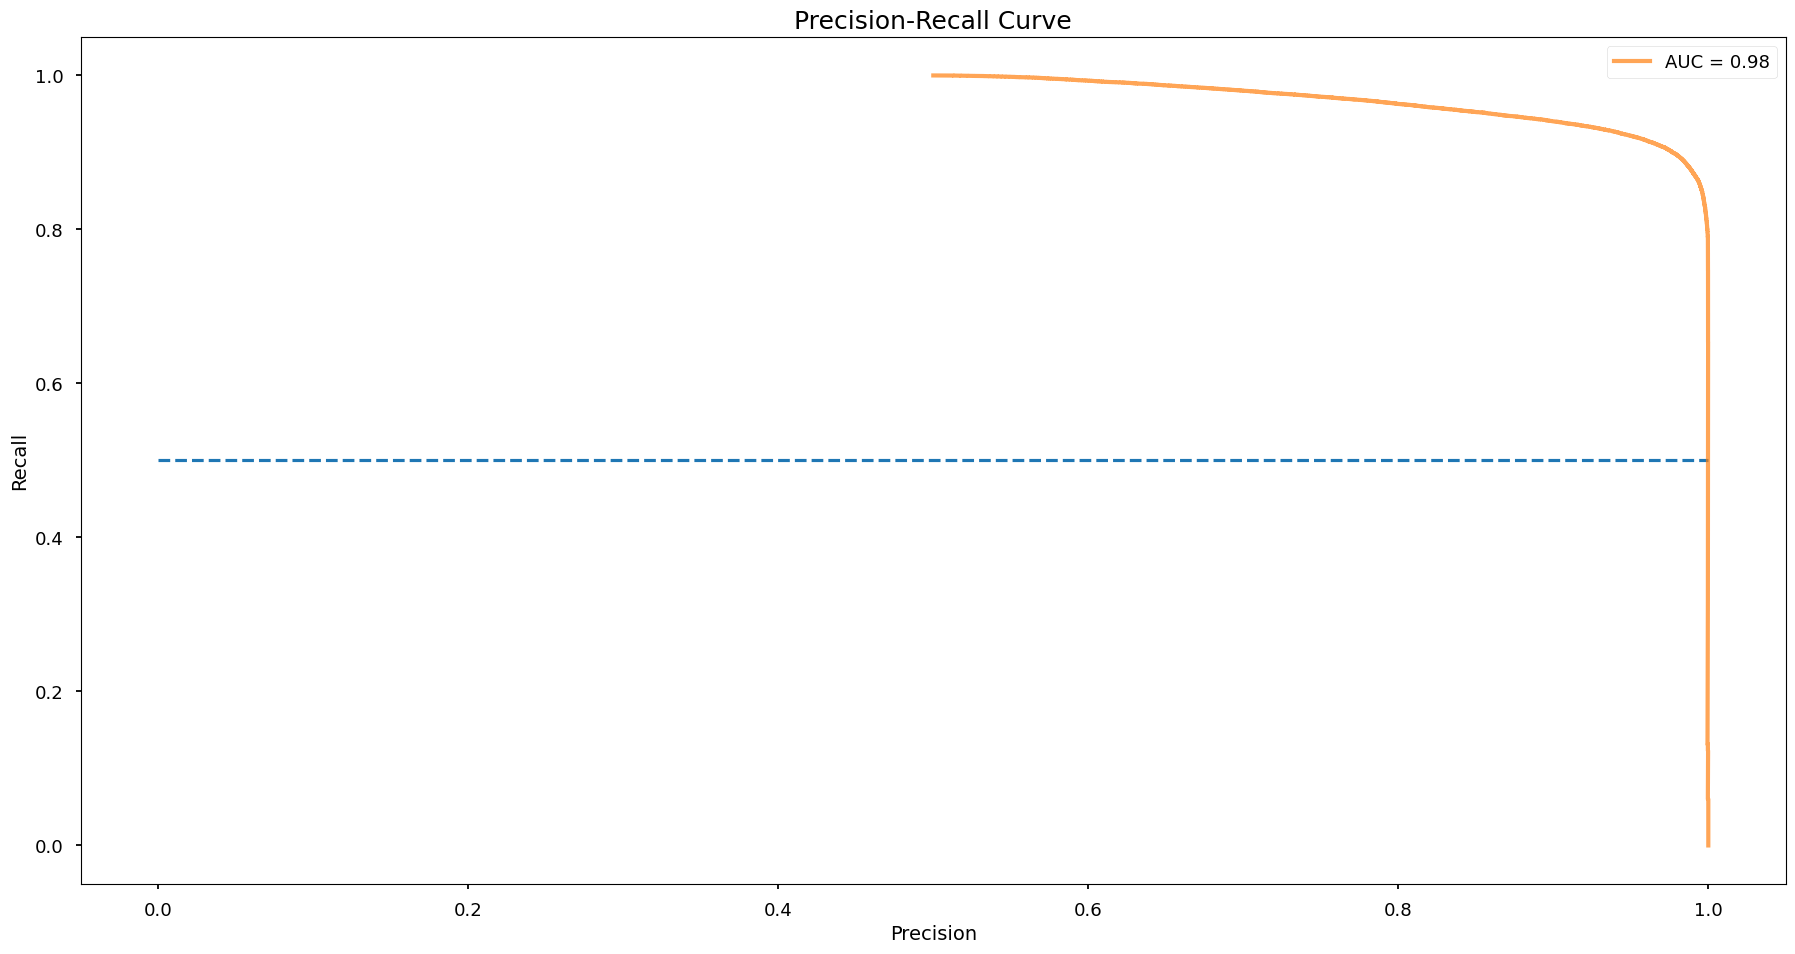

In [42]:
# calculating Precision and Recall for various thresholds
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

# Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [125]:
# training Multi-layer Perceptron with single hidden layer for 60 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred_probs = First_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_first_pred = (Y_first_pred_probs > 0.5).astype(int)
    
    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

[0.9510652221333529, 0.9342505794848405, 0.9480577439774124, 0.9359471545469726, 0.5649617723499282, 0.955820514185341, 0.9164001999679297, 0.9172356812505343, 0.9482988688978247, 0.9431363185541638, 0.9562661377504981, 0.9482127574339458, 0.9083292592912124, 0.9390874313512932, 0.9529406478860584, 0.947952257093918, 0.9334677607565276, 0.9506497676534335, 0.9479081139270532, 0.9537630230687908, 0.9479459508479189, 0.9488775601466775, 0.9351405473559298, 0.9445303947380326, 0.9457081918292248, 0.9273475393288223, 0.9099254268084945, 0.9431443034260143, 0.9260259026909078, 0.9480251370990478, 0.9482455581156028, 0.8930625431827249, 0.9024447366998758, 0.9554972410446286, 0.9497472766089448, 0.9477881528767274, 0.9262185601143782, 0.9483838089691322, 0.9122977995623968, 0.9209612235819681, 0.886573122761698, 0.9483599817268159, 0.9547618409653188, 0.9301471277293599, 0.9321708317791868, 0.9536641531584412, 0.9290198055956459, 0.8997147415752067, 0.9062943772788331, 0.9304837909734434, 0.

In [175]:
# training Multi-layer perceptron with 2 hidden layers
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=22,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(100, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
Model2.add(Dropout(0.5))
Model2.add(Dense(100, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
613/613 - 4s - loss: 110.7995 - accuracy: 0.5003 - val_loss: 0.7154 - val_accuracy: 0.6240 - 4s/epoch - 7ms/step
Epoch 2/40
613/613 - 2s - loss: 0.8149 - accuracy: 0.5002 - val_loss: 0.7161 - val_accuracy: 0.3760 - 2s/epoch - 4ms/step
Epoch 3/40
613/613 - 3s - loss: 0.7347 - accuracy: 0.5021 - val_loss: 0.7143 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 4/40
613/613 - 3s - loss: 0.7258 - accuracy: 0.5027 - val_loss: 0.7123 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 5/40
613/613 - 3s - loss: 0.7167 - accuracy: 0.5022 - val_loss: 0.7114 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 6/40
613/613 - 3s - loss: 0.7148 - accuracy: 0.5024 - val_loss: 0.7104 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 7/40
613/613 - 3s - loss: 0.7137 - accuracy: 0.5023 - val_loss: 0.7092 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 8/40
613/613 - 3s - loss: 0.7135 - accuracy: 0.5025 - val_loss: 0.7097 - val_accuracy: 0.3760 - 3s/epoch - 4ms/step
Epoch 9/40
613/613 - 3

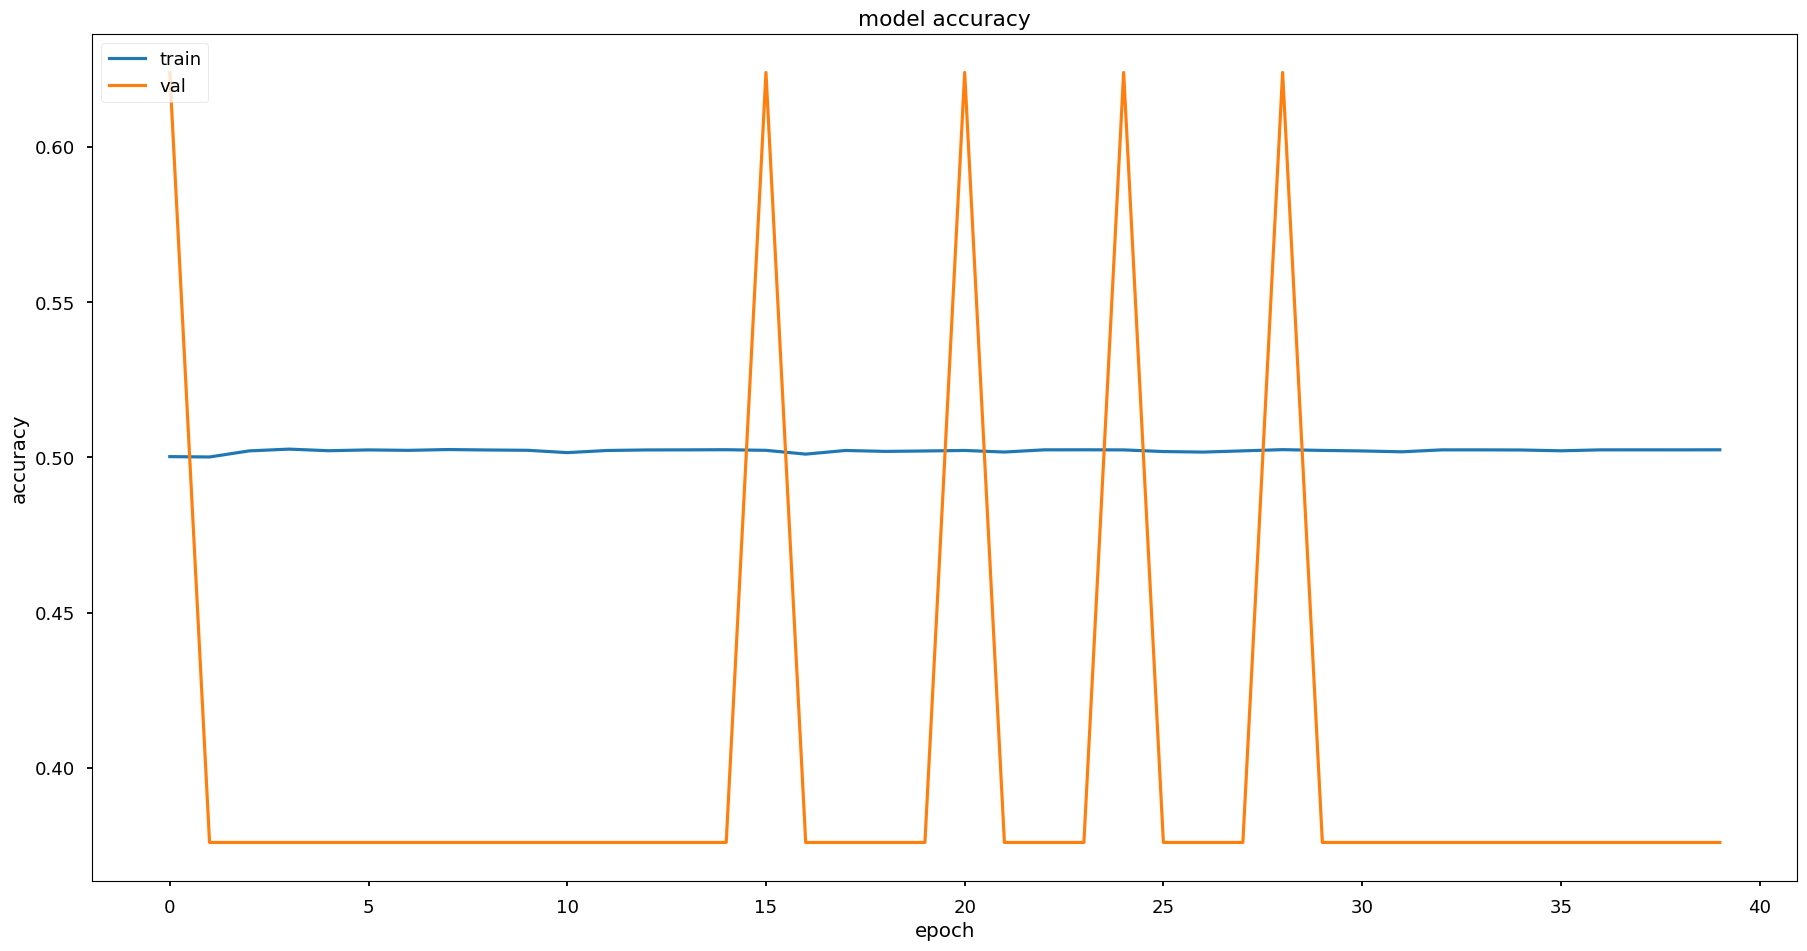

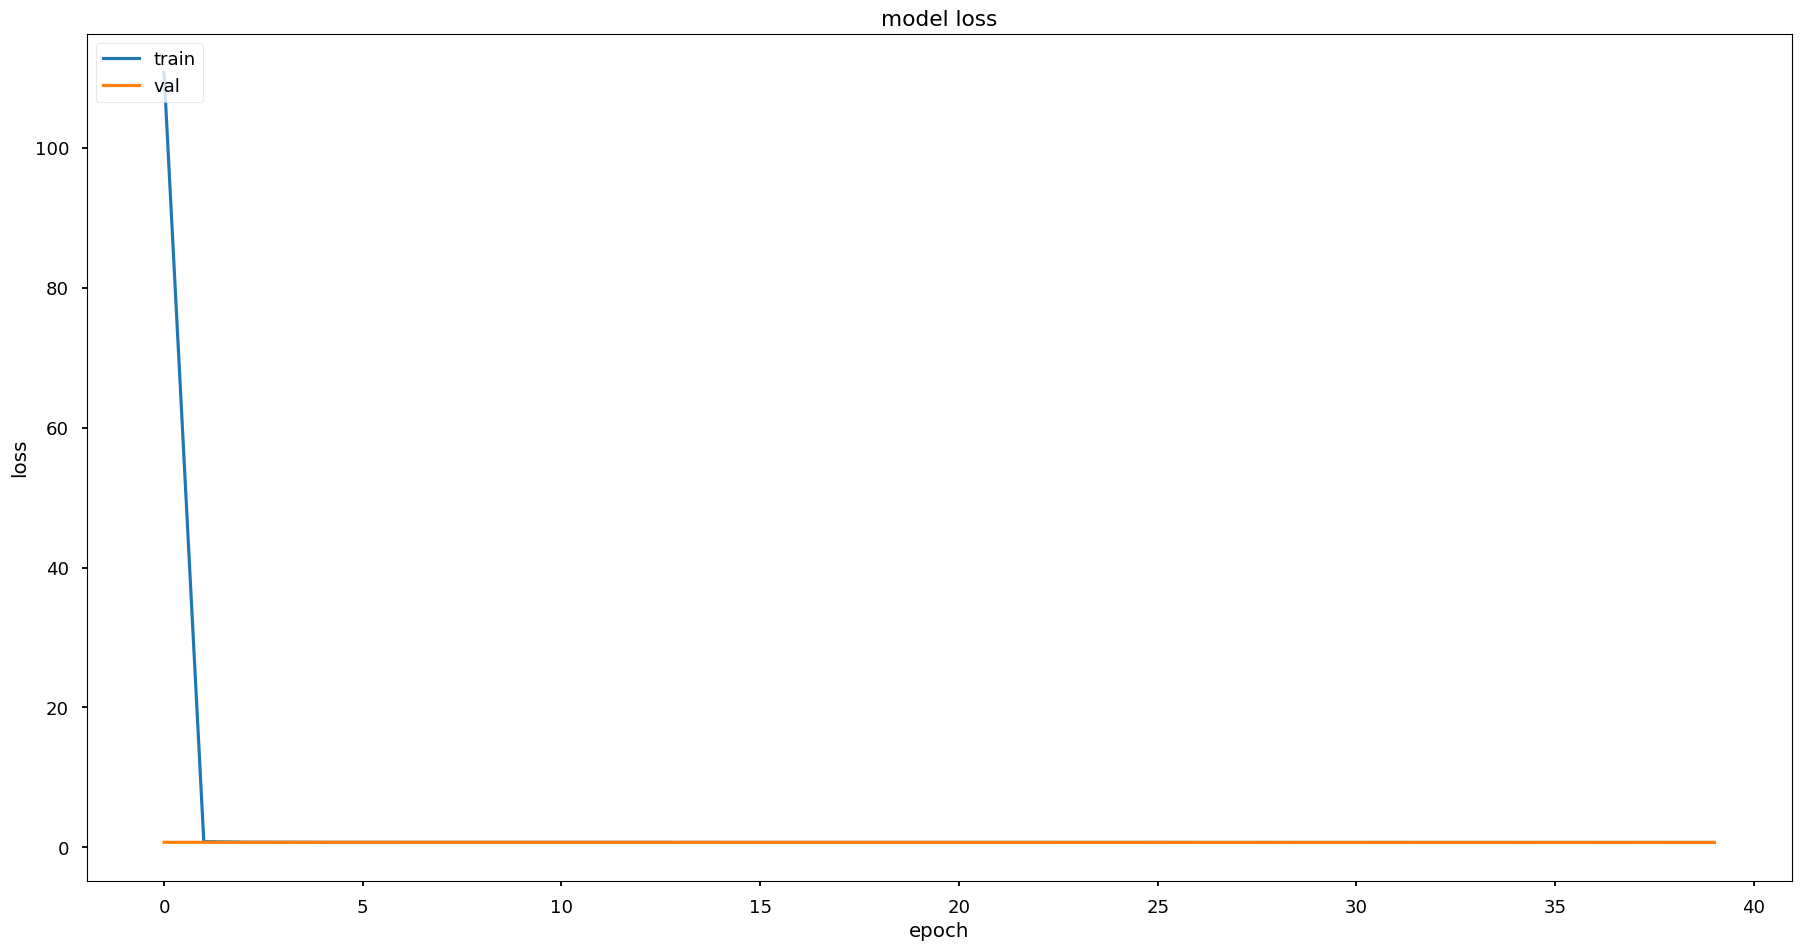

In [176]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [177]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))

Y_pred_probs = Model2.predict(Xtest_arr, batch_size=200, verbose=0)
Y_pred_cls = (Y_pred_probs > 0.5).astype(int)
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))

conf_matrix = confusion_matrix(Ytest_arr, Y_pred_cls)
conf_matrix

3554/3554 [==============================] - 5s 1ms/step - loss: 0.6943 - accuracy: 0.5000
Accuracy MLP: 0.5
3554/3554 [==============================] - 5s 1ms/step - loss: 0.6943 - accuracy: 0.5000
Loss value: 0.6942896246910095
Recall_score: 1.0
Precision_score: 0.5
F-score: 0.6666666666666666


array([[    0, 56863],
       [    0, 56863]], dtype=int64)

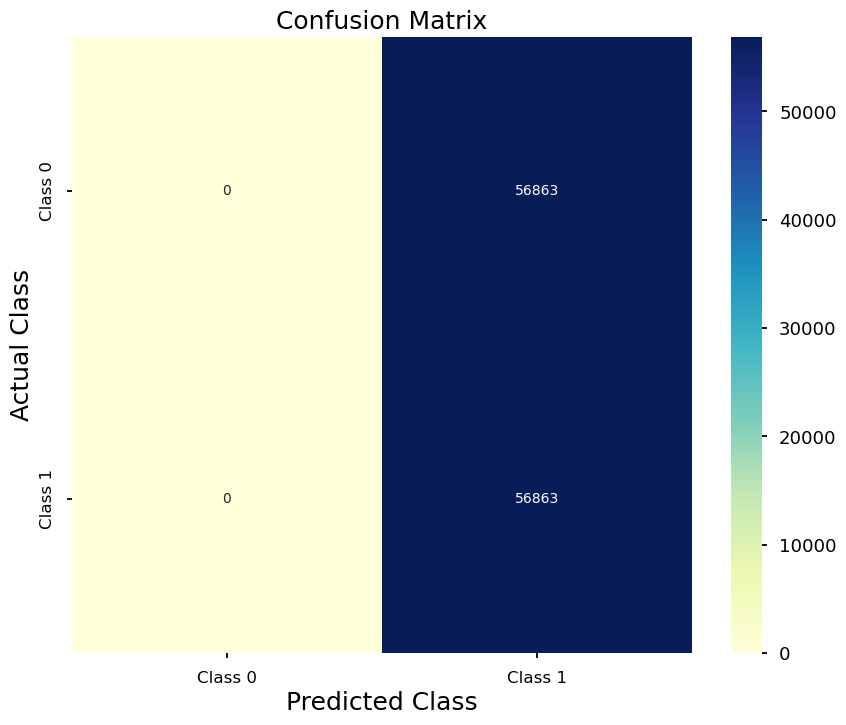

In [133]:
# create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

# labels, title and ticks
label_font = {'size':'18'}  # adjust to fit
plt.xlabel('Predicted Class', fontdict=label_font)
plt.ylabel('Actual Class', fontdict=label_font)
plt.title('Confusion Matrix', fontdict=label_font)
tick_marks = np.arange(len(['Class 0', 'Class 1'])) + 0.5
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=0, fontsize=12)
plt.yticks(tick_marks, ['Class 0', 'Class 1'], rotation=90, fontsize=12)

plt.show()

3554/3554 [==============================] - 3s 790us/step


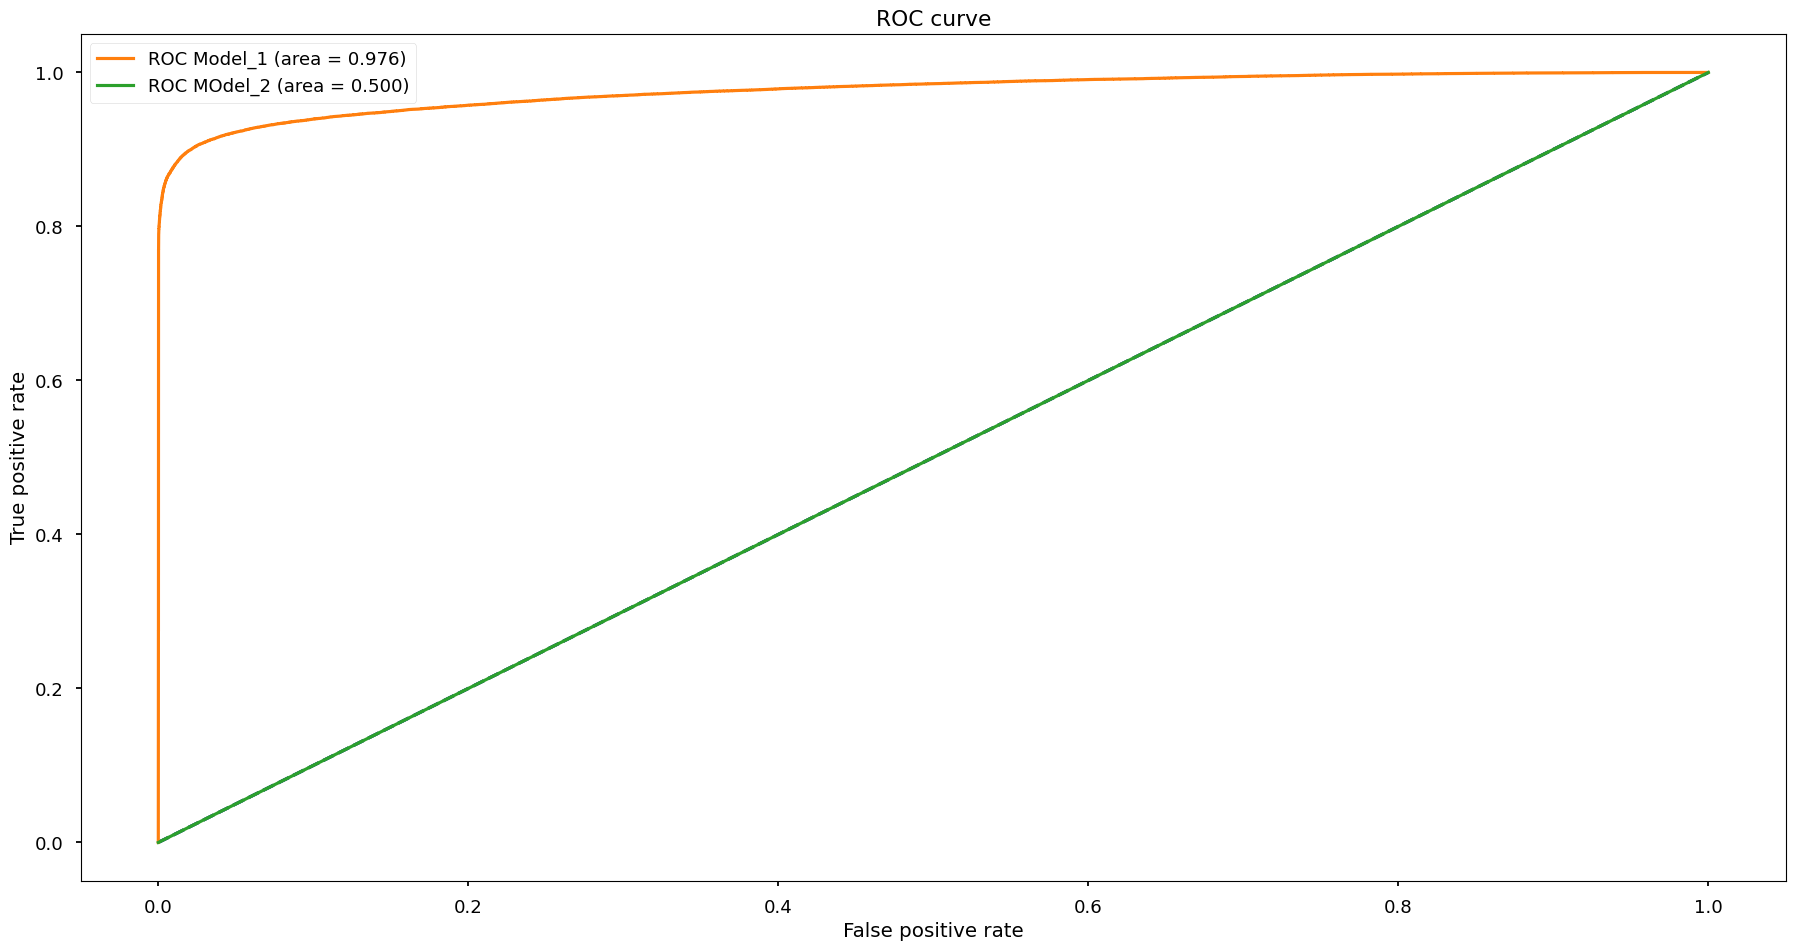

In [136]:
# comparing the ROC and PR curves before iterating the model
Y_pred_prob2 = Model2.predict(Xtest_arr).ravel()

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(Ytest_arr, Y_pred_prob2, pos_label=1)
auc_model2 = roc_auc_score(Ytest_arr, Y_pred_prob2)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr_model1, tpr_model1, label='ROC Model_1 (area = {:.3f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='ROC MOdel_2 (area = {:.3f})'.format(auc_model2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

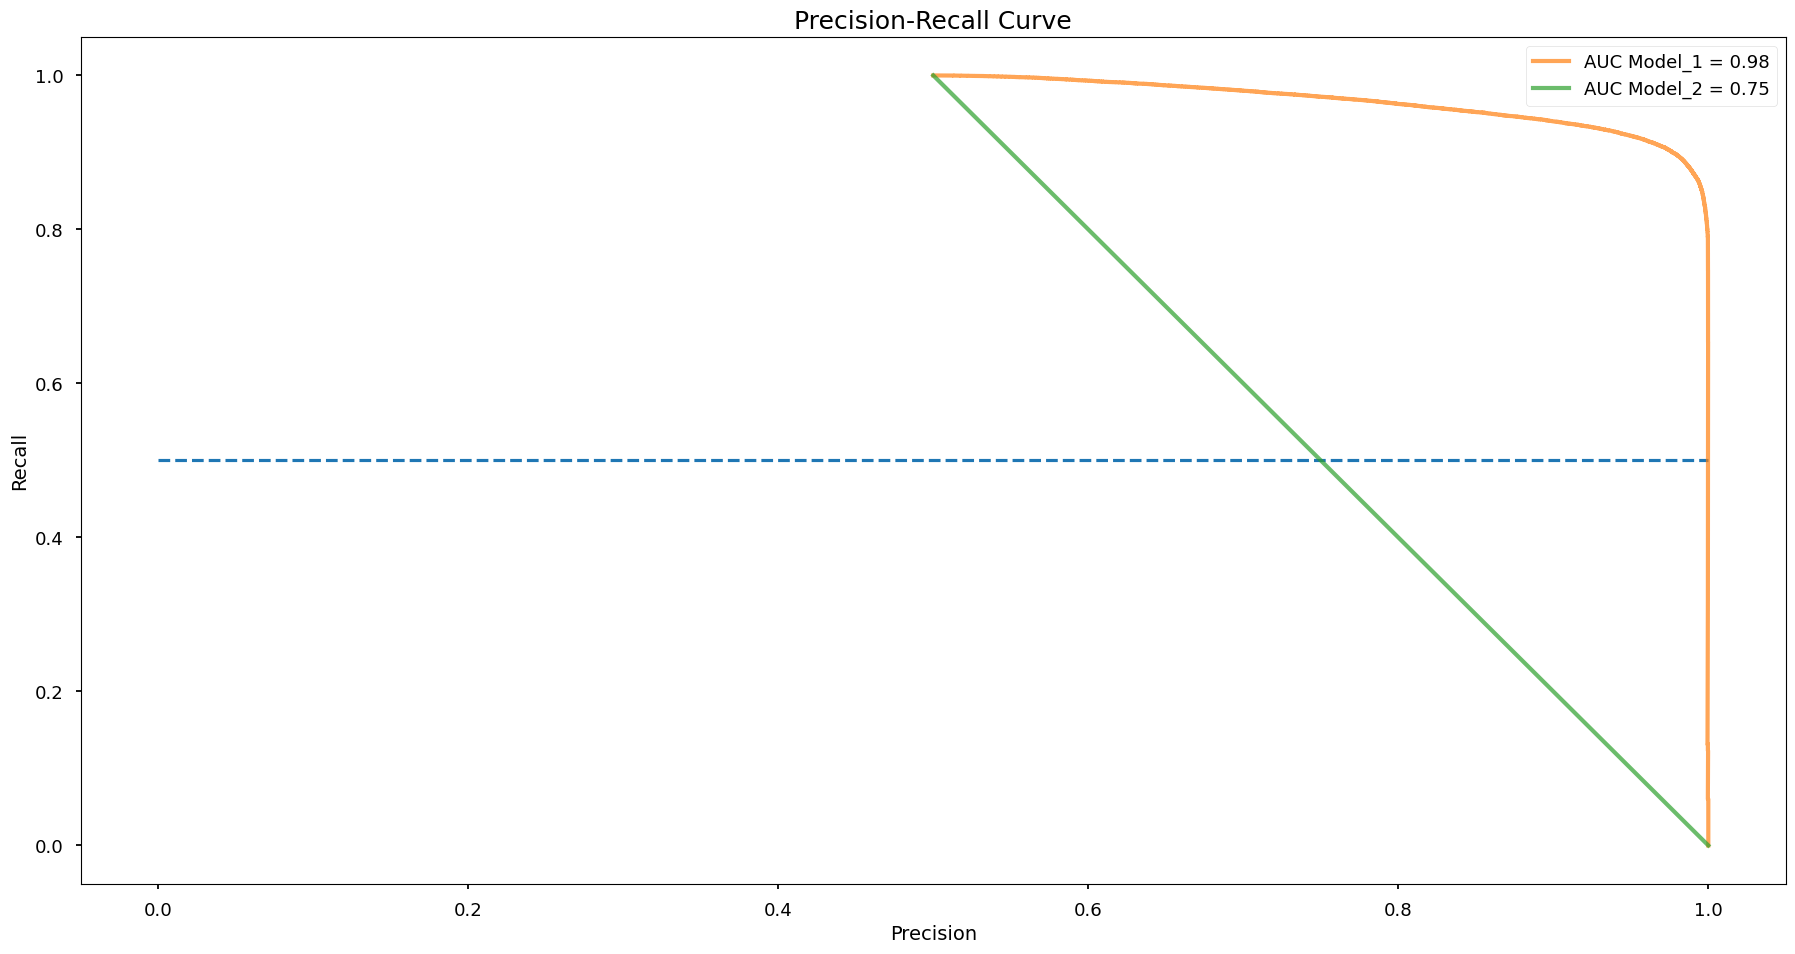

In [137]:
# calculating Precision and Recall for various thresholds
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

# auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

#### TRAINING MULTI-LAYER PERCEPTRON WITH 2 HIDDEN LAYERS

In [178]:
# iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,60):
    
    Second_Model = Sequential()
    Second_Model.add(Dense(100, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu',kernel_regularizer=l2(0.0001)))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(100, kernel_initializer='he_normal', activation='relu', kernel_regularizer=l2(0.0001)))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred_probs = Second_Model.predict(Xtest_arr, batch_size=200, verbose=0)
    Y_second_pred = (Y_second_pred_probs > 0.5).astype(int)
    
    f_score= f1_score(Ytest_arr,Y_second_pred)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)


[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.14155816693351056, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.005121459265105674, 0.015330311104958992, 0.0, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.061780778946325665, 0.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.04036827195467421, 0.6666666666666666, 0.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.23726862695236695]
FScore Mean: 0.430579349141504

## RESULT ANALYSIS

* If the Null Hypothesis is accepted, this means there is no difference between the datasets and the change of number of hidden layers does not affect the performance of the model.
* If the Null Hypothesis is rejected, this means there is significant difference between the datasets and the change of number of hidden layers affects the performance of the model.

In [179]:
# comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.9282115397642581
----------------------------------------
Model-2
---------
Average F-Score: 0.43057934914150464


In [180]:
# comparing the Standard Deviation for F-scores generated after iterations
fscore_df1=pd.DataFrame(f_scorelist1)

print('Model-1')
print('------------------')
print('F_score SD: ' + str(fscore_df1.std()))

print('-'*40)

fscore_df2=pd.DataFrame(f_scorelist2)

print('Model-2')
print('------------------')
print('F_score SD: ' + str(fscore_df2.std()))

Model-1
------------------
F_score SD: 0    0.051059
dtype: float64
----------------------------------------
Model-2
------------------
F_score SD: 0    0.314805
dtype: float64


<Axes: >

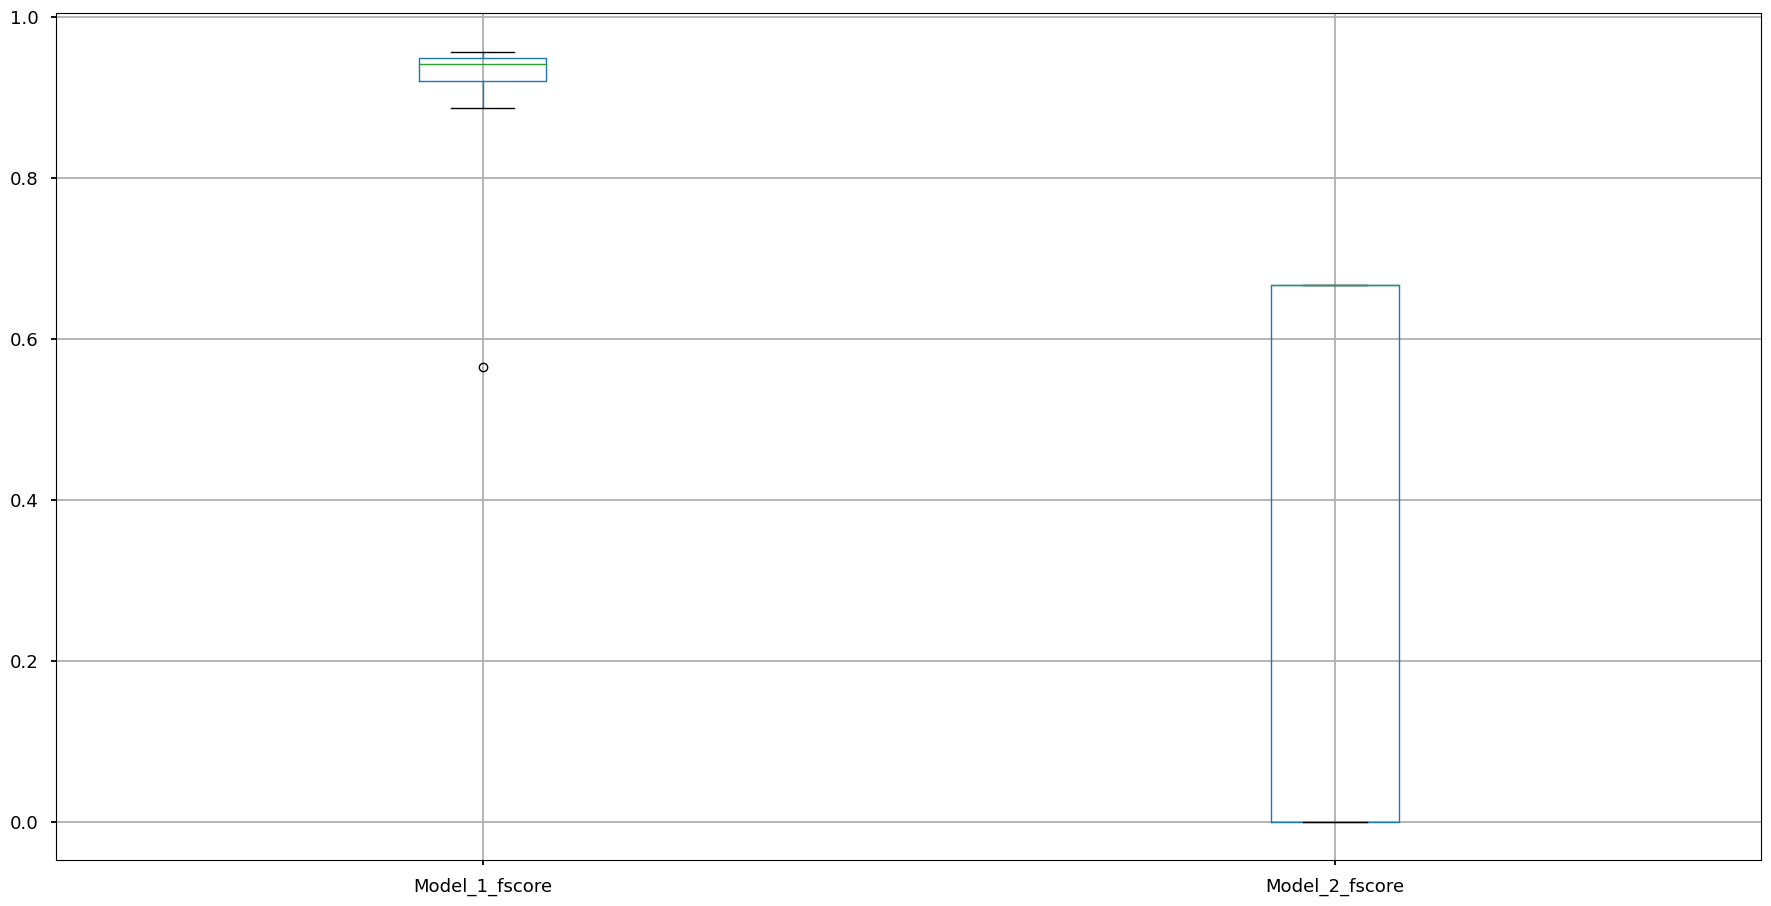

In [181]:
# visualize the results using a boxplot()

results_fscore= pd.concat([fscore_df1, fscore_df2], axis=1)
results_fscore.columns = ['Model_1_fscore', 'Model_2_fscore']

results_fscore.boxplot()

array([[<Axes: title={'center': 'Model_1_fscore'}>,
        <Axes: title={'center': 'Model_2_fscore'}>]], dtype=object)

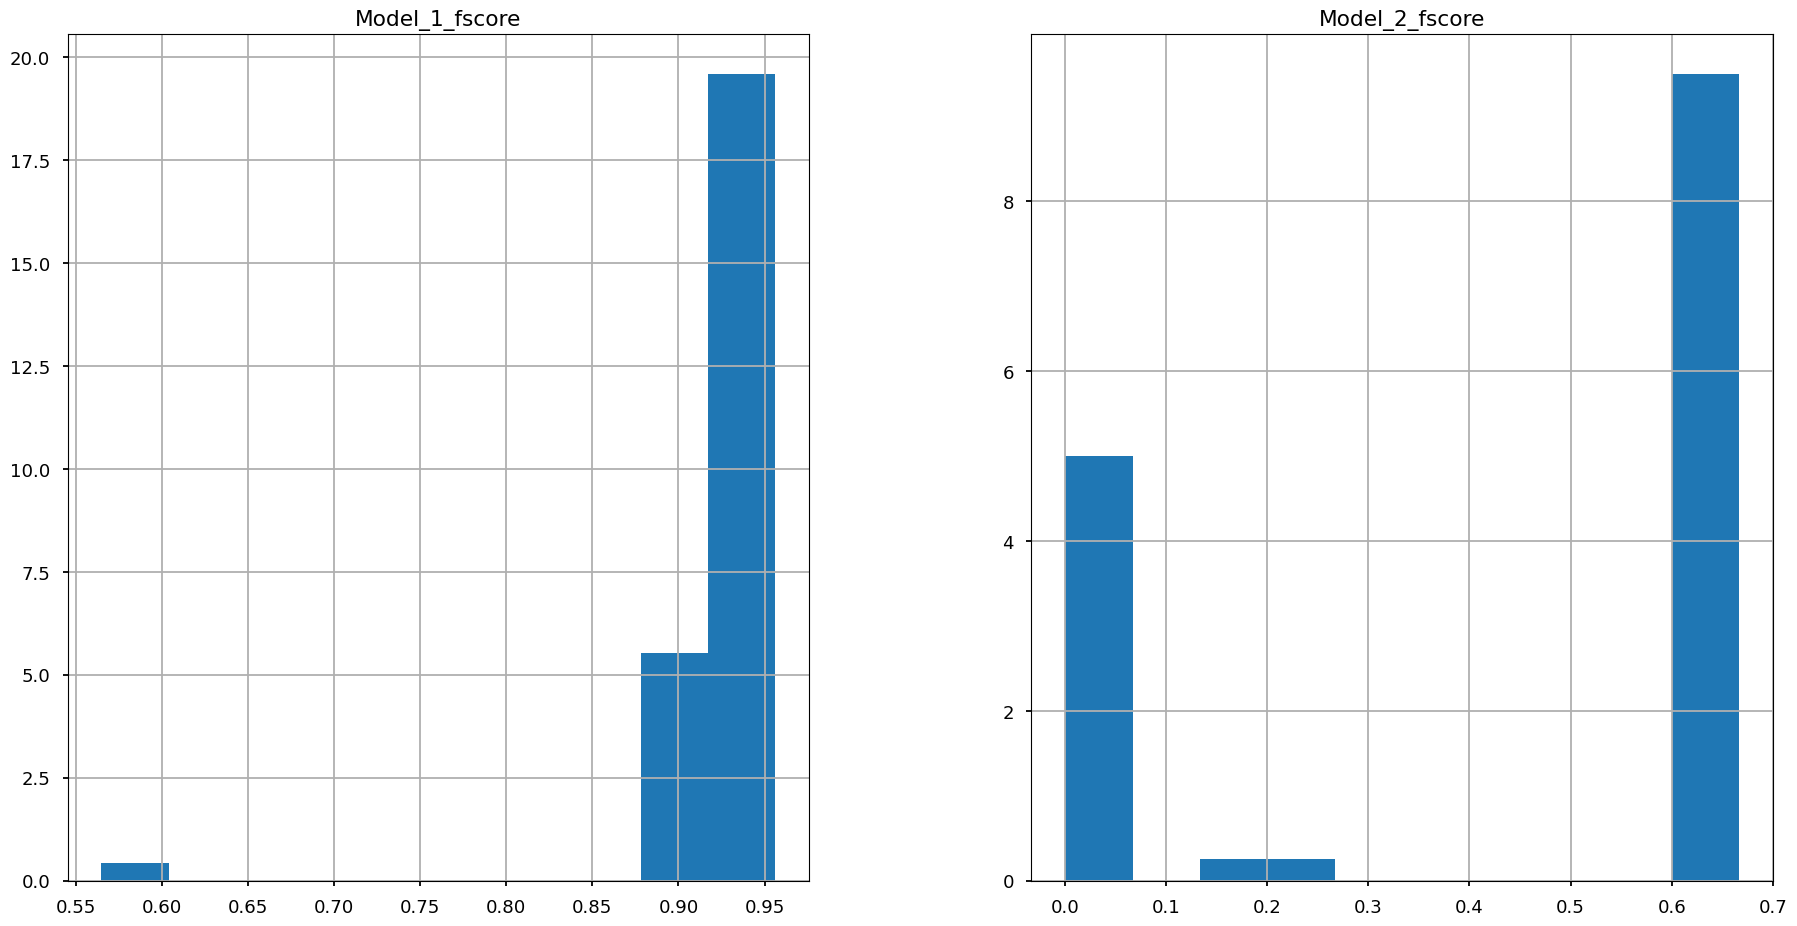

In [182]:
# distribution of the data using a Histogram
results_fscore.hist(density=True)

In [184]:
# testing the Null Hypothesis that a sample comes from a Normal Distribution
alpha = 0.0001;

s, p = stats.normaltest(fscore_df1)
if p < alpha:
  print('Model-1 Data is not normal')
else:
  print('Model-1 Data is normal')

s, p = stats.normaltest(fscore_df2)
if p < alpha:
  print('Model-2 Data is not normal')
else:
  print('Model-2 Data is normal')

Model-1 Data is not normal
Model-2 Data is not normal


In [185]:
# Wilcoxon Signed-Rank Test
# it tests the null hypothesis that two related paired samples come from the same distribution.
# it is a non-parametric version of the paired T-test.

s, p = stats.wilcoxon(fscore_df1[0], fscore_df2[0])

if p < 0.0001:
  print('Null hypothesis rejected, significant difference between the data-sets')
else:
  print('Null hypothesis accepted, no significant difference between the data-sets')

Null hypothesis rejected, significant difference between the data-sets
